<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙈 Introverts and Extroverts 🗣️
    </h1>
</div>


# 📂 Overview

* **Background** <br>
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Extrovert vs. Introvert Behavior dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note - This is a relatively small dataset, so a one to use for comparing different modeling approaches, making visualization, etc.

* **Goal of the Project** <br>
Build a machine learning model to **predict a binary label** for each people: whether they were **Extrovert or Introvert** (`Personality` = Extrovert/Introvert).

🧾 **Key Features**

| Feature                         | Type                      | Description                                 |
| ------------------------------- | ------------------------- | ------------------------------------------- |
| **Time\_spent\_Alone**          | Numerical (discrete)      | Hours spent alone daily (0–11)              |
| **Stage\_fear**                 | Categorical (Yes/No)      | Presence of stage fright                    |
| **Social\_event\_attendance**   | Numerical (discrete)      | Frequency of attending social events (0–10) |
| **Going\_outside**              | Numerical (discrete)      | Frequency of going outside (0–7)            |
| **Drained\_after\_socializing** | Categorical (Yes/No)      | Feeling drained after socializing           |
| **Friends\_circle\_size**       | Numerical (discrete)      | Number of close friends (0–15)              |
| **Post\_frequency**             | Numerical (discrete)      | Frequency of posting on social media (0–10) |
| **Personality** *(target)*      | Categorical (Extro/Intro) | Personality type: Extrovert or Introvert    |


📁 **Files Provided**

* `train.csv`: the training set.
* `test.csv`: the test set.
* `Sample_submission.csv`: A submission file in the correct format.

(Source: [Kaggle Dataset](https://www.kaggle.com/competitions/playground-series-s5e7/data))

🎯 **Project Objective**

The primary objective of this notebook is to **EDA and build machine learning model to predict**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **Modeling:** Train with some models and choise the best model for predicting.
* **Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **Evaluation Framework:** <br>
  * Cross-validation.
  * Metrics: Accuracy, F1-score, ROC-AUC, Confusion matrix

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [256]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [199]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (18524, 9)

Test Data Shape: (6175, 8)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [200]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert



Test Data Preview:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [201]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------       

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 18524 samples with 9 columns, including the target variable `Personality`.
   - The **test dataset** includes 6175 samples with 8 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `Time_spent_Alone`, `Social_event_attendance`, `Going_outside`, `Friends_circle_size`, `Post_frequency`.
     - **Categorical features:** `Stage_fear`, `Drained_after_socializing`.
   - The target variable is object instance.

**Data Consistency and Completeness**  
   - The datasets have **missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

In [202]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [203]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,17334.000000,3.137764,3.003786,0.000000,1.000000,2.000000,4.000000,11.000000
Social_event_attendance,17344.000000,5.265106,2.753359,0.000000,3.000000,5.000000,8.000000,10.000000
Going_outside,17058.000000,4.044319,2.062580,0.000000,3.000000,4.000000,6.000000,7.000000
Friends_circle_size,17470.000000,7.996737,4.223484,0.000000,5.000000,8.000000,12.000000,15.000000
Post_frequency,17260.000000,4.982097,2.879139,0.000000,3.000000,5.000000,7.000000,10.000000



Test Data describe:


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,5750.000000,3.116870,2.985658,0.000000,1.000000,2.000000,4.000000,11.000000
Social_event_attendance,5778.000000,5.287989,2.758052,0.000000,3.000000,5.000000,8.000000,10.000000
Going_outside,5709.000000,4.037835,2.045207,0.000000,3.000000,4.000000,6.000000,7.000000
Friends_circle_size,5825.000000,8.008412,4.192701,0.000000,5.000000,8.000000,12.000000,15.000000
Post_frequency,5767.000000,5.028958,2.867285,0.000000,3.000000,5.000000,7.000000,10.000000


## Descriptive Insights from Dataset Statistics

**1. Overview of Numeric Features**

Both train and test datasets include summary statistics for the numeric features: `count`, `mean`, `std`, `min`, percentiles (`25%`, `50%`, `75%`), and `max`.

| Feature                   | Data Type        | Value Range    | Initial Observation          |
| ------------------------- | ---------------- | -------------- | ---------------------------- |
| `Time_spent_Alone`        | Discrete numeric | 0–11 (hrs/day) | Right-skewed distribution (mean > median)    |
| `Social_event_attendance` | Discrete numeric | 0–10           | Fairly even, slight skew     |
| `Going_outside`           | Discrete numeric | 0–7            | Roughly uniform distribution |
| `Friends_circle_size`     | Discrete numeric | 0–15           | Large values, high variance  |
| `Post_frequency`          | Discrete numeric | 0–10           | Mild skew possibly present   |

**2. Train vs. Test Comparison**

`Time_spent_Alone`

* **Mean**: Train \~ 3.13, Test \~ 3.12 → nearly identical
* **Std**: \~3.0 → low variance → most values between 0–4
* **Max**: 11 for both sets → consistent

**Conclusion**: Very similar distribution, no strong signs of outliers.

`Social_event_attendance`

* Mean: 5.26 (Train), 5.29 (Test) → almost identical
* Std: \~2.75 → fairly even spread
* Percentiles (25/50/75): identical → (3, 5, 8)

**Conclusion**: Extremely stable across datasets, no further action needed.

`Going_outside`

* Mean and Std are close: \~4.04 and \~2.06
* Median = 4 → close to mean → roughly normal distribution
* Min = 0, Max = 7 (max allowed value)

**Conclusion**: Stable distribution, no abnormalities.

`Friends_circle_size`

* Mean: 7.99 (Train), 8.00 (Test) → nearly the same
* Std: \~4.2 → **relatively high variance** ( Std/Mean = 4.2 / 8.0 = 0.525 = 52.5% -> high variance)
* Min = 0, Max = 15 → spans full possible range

**Conclusion**: Might have a few outliers in the higher range (12–15).

`Post_frequency`

* Mean: \~4.98 (Train), \~5.03 (Test)
* Std: \~2.87
* Percentiles are very similar

**Conclusion**: Good distribution; possibly mildly skewed but not significant.

**3. Overall Observations**

* **Train-test consistency**: Excellent. Distribution statistics match well → no concerning bias or drift.
* **No clear outliers**, except a few potential high-end values in `Friends_circle_size`.

In [204]:
print("Train Data describe:")
df_train.drop(columns="Personality", axis=1).describe(include=["category", "object"]).T

Train Data describe:


,count,unique,top,freq
Stage_fear,16631,2,No,12609
Drained_after_socializing,17375,2,No,13313


In [205]:
print("\nTest Data describe:")
df_test.describe(include=["category", "object"]).T


Test Data describe:


,count,unique,top,freq
Stage_fear,5577,2,No,4236
Drained_after_socializing,5743,2,No,4437


## Insights on Categorical Features

1. `Stage_fear` (2 categories: Yes and No)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | No     | 12609 | \~76% |
| Test  | No     | 4236 | \~76% |

→ **Very consistent distribution** between train and test.

2. `Drained_after_socializing` (True/False)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | False     | 13313 | \~76.6% |
| Test  | False     | 2640 | \~77.2% |

→ Very close proportions — no distribution shift.

**Conclusion:**

* The distributions of **categorical features are highly consistent between train and test** <br>
  → The model can learn well on the train set and **generalize effectively to the test set** <br>
  → **No need for domain adaptation, rebalancing, or other special techniques**

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [206]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")


In [207]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
+---------------------------+---------------+-----------+
| Feature                   | Missing_Count | Missing_% |
+---------------------------+---------------+-----------+
| Stage_fear                | 1893          | 10.22     |
| Going_outside             | 1466          | 7.91      |
| Post_frequency            | 1264          | 6.82      |
| Time_spent_Alone          | 1190          | 6.42      |
| Social_event_attendance   | 1180          | 6.37      |
| Drained_after_socializing | 1149          | 6.2       |
| Friends_circle_size       | 1054          | 5.69      |
+---------------------------+---------------+-----------+

⚠️  Total missing values: 9,196 out of 18,524 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
+---------------------------+---------------+-----------+
| Feature                   | Missing_Count | Missing_% |
+---------------------------+---------------+-----------

## Checking duplicate Value

In [208]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 18,524 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 6,175 rows



## Checking Outlier Value

In [209]:
num_features = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]
cat_features = ["Stage_fear", "Drained_after_socializing"]

In [210]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Time_spent_Alone,1653,"[9.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 10.0, 9.0, 11.0, 10.0, 9.0, 9.0, 10.0, 9.0, 10.0, 11.0, 10.0, 10.0, 11.0, 10.0, 10.0, 11.0, 10.0, 10.0, 9.0, 11.0, 11.0, 9.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 9.0, 11.0, 9.0, 10.0, 11.0, 10.0, 11.0, 9.0, 10.0, 9.0, 11.0, 9.0, 10.0, 11.0, 9.0, 11.0, 9.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 11.0, 10.0, 9.0, 9.0, 10.0, 9.0, 11.0, 9.0, 10.0, 10.0, 10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 10.0, 11.0, 9.0, 10.0, 11.0, 9.0, 10.0, 10.0, 10.0, 11.0, 9.0, 10.0, 9.0, 9.0, 10.0, 9.0, 11.0, ...]"


In [211]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Time_spent_Alone,529,"[9.0, 11.0, 9.0, 11.0, 11.0, 10.0, 9.0, 11.0, 9.0, 9.0, 11.0, 9.0, 9.0, 10.0, 11.0, 11.0, 9.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 10.0, 10.0, 11.0, 9.0, 11.0, 10.0, 9.0, 9.0, 9.0, 11.0, 11.0, 10.0, 11.0, 9.0, 9.0, 10.0, 11.0, 9.0, 9.0, 9.0, 11.0, 11.0, 10.0, 11.0, 9.0, 11.0, 10.0, 9.0, 9.0, 11.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 9.0, 9.0, 10.0, 10.0, 11.0, 9.0, 11.0, 11.0, 11.0, 9.0, 10.0, 9.0, 11.0, 11.0, 10.0, 10.0, 11.0, 11.0, 9.0, 11.0, 9.0, 11.0, 11.0, 9.0, 9.0, 10.0, 10.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 10.0, 10.0, 10.0, ...]"


## Data Quality Insights: Missing Values, Duplicates and Outliers

**1. Missing Values Analysis**

- We conducted a thorough check for missing values across the **training**, **test** datasets.  
- The **missing values** were detected in the datasets.

**Train Set:**

* There are **9,196** missing cells out of **18,524** rows → about **49.6% of rows** have at least one missing value.
* Highest missing rates:

  * `Stage_fear`: **10.22%**
  * `Going_outside`: **7.91%**
  * Other features also have >5% missing values.

**Test Set:**

* Contains **3,076** missing values out of **6,175** rows → around **49.8% of rows affected**.
* Most missing values:

  * `Stage_fear`: **9.68%**

* Missing patterns are **very consistent** across train and test datasets (mostly in social-related features).
* The missing proportion is **moderate (5–10%)**, but should be handled during preprocessing.

**2. Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Training Data: 0 duplicates out of 18524 rows  
  - Test Data: 0 duplicates out of 6175 rows 
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**3. Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train** and **test** datasets contain **notable outliers** in `Time_spent_Alone`:

  * **Train**: 1,653 outliers
  * **Test**: 529 outliers
  * Most outlier values: **9.0 to 11.0**
  * These values likely exceed the 1.5×IQR threshold and are flagged as outliers.

**4. Summary Table:**

| Aspect                 | Quick Note                                          |
| ---------------------- | --------------------------------------------------- |
| Missing Values         | Present, moderate level, preprocessing needed       |
| Outliers               | Found in `Time_spent_Alone`, further review advised |
| Duplicates             | None, clean datasets                                |
| Train/Test Consistency | Excellent: similar missing patterns and outliers    |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [212]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [213]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Personality Distribution

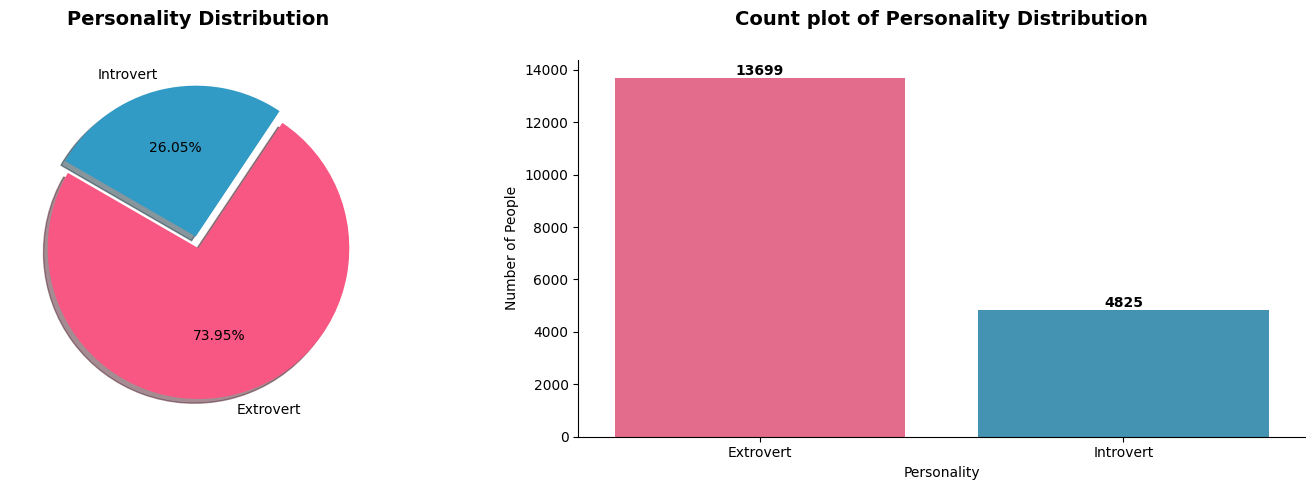

In [214]:
personality_Distribution  = df_train["Personality"].value_counts().loc[["Extrovert", "Introvert"]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    personality_Distribution,
    labels = ["Extrovert", "Introvert"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Personality Distribution", weight="bold", fontsize=14, pad=25)
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)

# ax[1]
sns.countplot(data=df_train, x = "Personality", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Personality Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of People")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Observation:**

The personality distribution chart clearly indicates that the training dataset is **highly imbalanced**. Specifically, the **Extrovert** group accounts for **73.95%**, while the **Introvert** group only makes up **26.05%** of the data.

This imbalance poses a risk of **model bias** toward the majority class during training. Without proper handling, the model may struggle to accurately predict the minority class (Introverts), leading to **poor generalization and unfair performance**.

## Numerical Feature Distributions

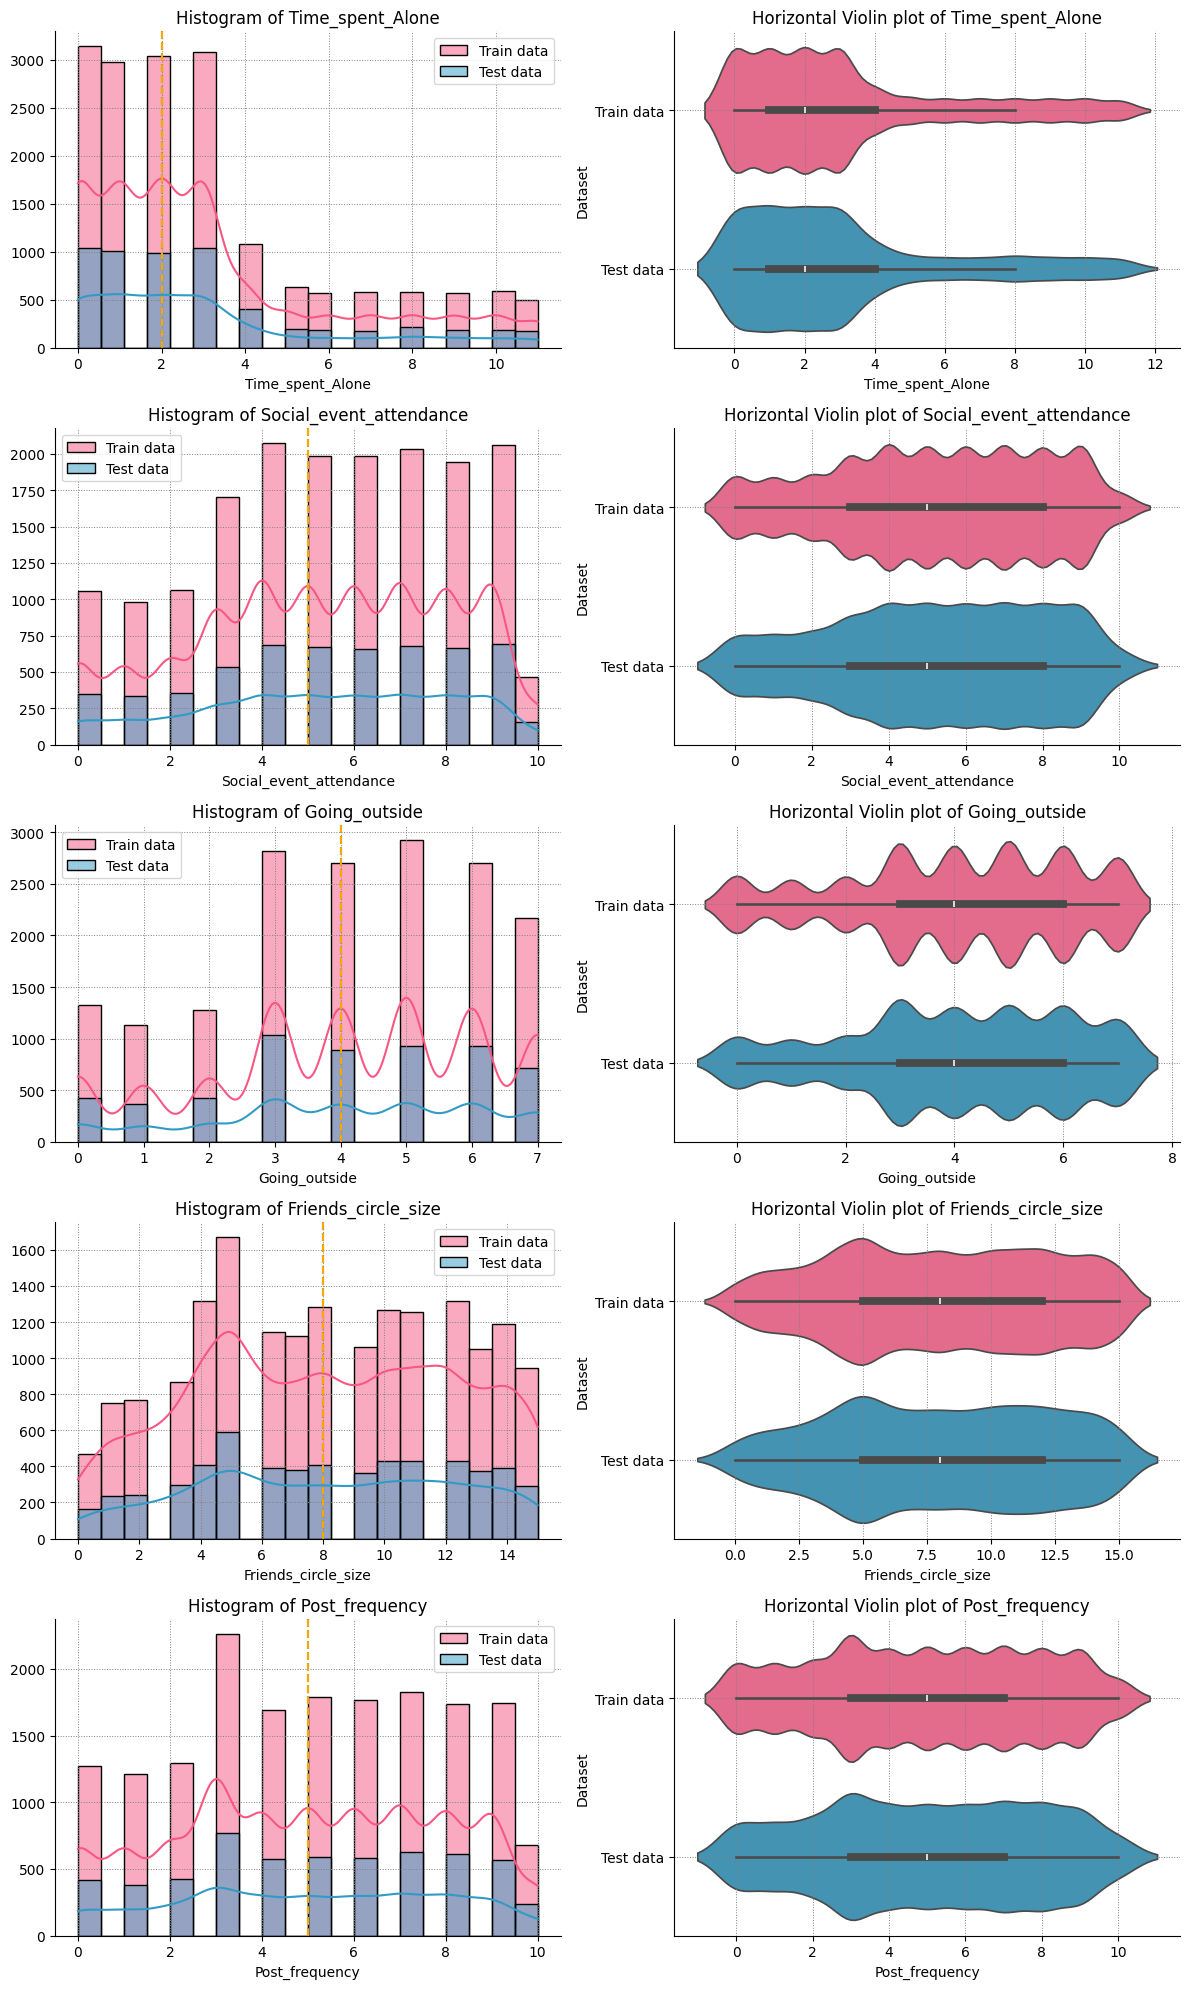

In [215]:
def plot_numerical_features(df_train, df_test, num_features):
    colors = color()
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].legend()
        # axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        # axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, num_features=num_features)

In [216]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_train, skew_train_df = check_skewness(df_train, "Train data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test data")


🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Time_spent_Alone               |   +1.1338 | Highly skewed
Going_outside                  |   -0.3672 | Approximately symmetric
Social_event_attendance        |   -0.2292 | Approximately symmetric
Post_frequency                 |   -0.0587 | Approximately symmetric
Friends_circle_size            |   -0.0518 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Time_spent_Alone               |   +1.1535 | Highly skewed
Going_outside                  |   -0.3454 | Approximately symmetric
Social_event_attendance

### Insights on Numerical Feature Distributions

**Remarks on Skewness (Distribution Asymmetry):**

| Feature                       | Train Skewness | Test Skewness | Interpretation                                                                                                                                                                                       |
| ----------------------------- | -------------- | ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Time\_spent\_Alone**        | +1.13          | +1.15         | ⚠️ **Strongly right-skewed distribution**. Most individuals spend little time alone, while only a few spend a lot. Consider applying **log or Yeo-Jonhson transformation** to reduce skewness if necessary. |
| **Going\_outside**            | -0.36          | -0.34         | ✅ **Approximately symmetric distribution**. No need to address skewness.                                                                                                                             |
| **Social\_event\_attendance** | -0.23          | -0.24         | ✅ **Slightly symmetric distribution**. Skewness is not significant.                                                                                                                                  |
| **Post\_frequency**           | -0.06          | -0.07         | ✅ **Very close to a normal distribution**. No transformation needed.                                                                                                                                 |
| **Friends\_circle\_size**     | -0.05          | -0.06         | ✅ **Approximately normal distribution**. No skewness handling required.                                                                                                                              |

**Insights from the Visualizations**:

1. **Violin plots** show that the distribution of features in both train and test sets is quite similar — this is a positive sign, indicating a well-balanced data split.
2. Specifically for `Time_spent_Alone`:

   * Most data points are concentrated in the lower range (0–3).
   * The long right tail confirms the **high positive skewness**.
   * It may require attention when using models sensitive to distribution, such as linear regression.

**Overall Conclusion**:

* Only **`Time_spent_Alone`** exhibits significant skewness and might benefit from transformation prior to modeling.
* All other features display approximately symmetric distributions and can be used directly in models.
* The distributions between the **Train** and **Test** sets are very similar, indicating a **well-stratified data split** and no major distributional shift.

## Correlation Analysis of Numerical Features

In [217]:
def plot_correlation(train_data, test_data, train_name="Train Data", test_name="Test Data"):
    corr_train = train_data.corr(numeric_only=True)
    corr_test = test_data.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    fig, ax = plt.subplots(1, 2, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

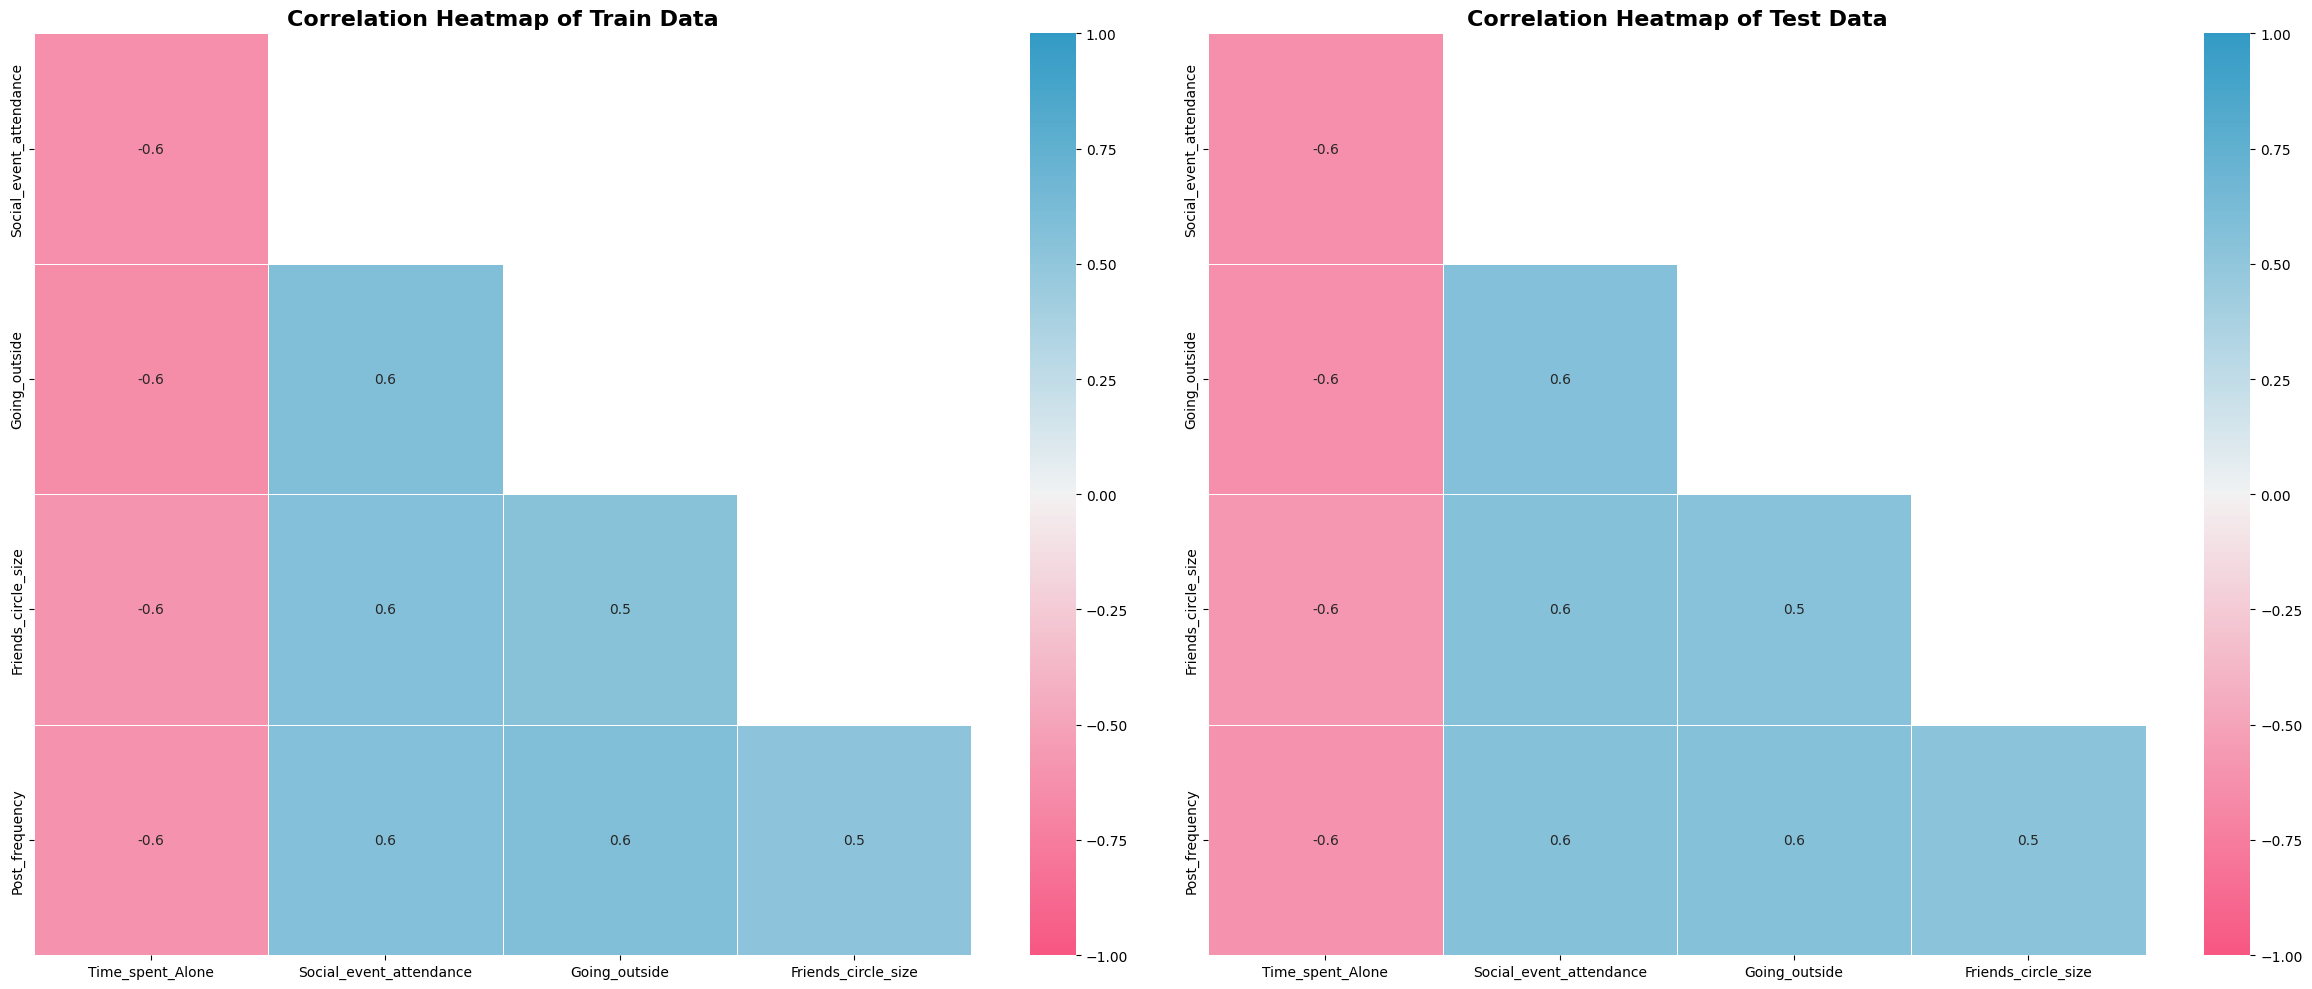

In [218]:
plot_correlation(train_data=df_train.drop(columns="Personality", axis=1), test_data=df_test)

**Observation on Correlation Heatmaps:**

* The **correlation structure between the training and test datasets is very consistent**, which suggests no data drift.
* **Several feature pairs have high correlation coefficients** in both datasets:
    - `Time_spent_Alone` shows a strong negative correlation (-0.6) with all other variables, implying that people who spend more time alone tend to go out less, attend fewer social events, and post less frequently.
    - `Social_event_attendance`, `Going_outside`, and `Friends_circle_size` share positive correlations (+0.6), suggesting that those who attend social activities also have more friends and go out more often.
    - `Post_frequency` is positively correlated with all other social variables, especially with `Friends_circle_size` (+0.5), meaning people with bigger friend circles tend to post more.

**Implication – Potential Multicollinearity:**

* The presence of strong correlations between some features may indicate **multicollinearity**.
* This is especially important when using **linear models (Logistic Regression)** since multicollinearity can:

  * Distort the estimated coefficients.
  * Reduce model interpretability.
  * Inflate variance.

## Categorical Feature Distributions

In [219]:
def plot_categorical_distribution_both(cat_features, df_train, df_test, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, y=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(df_train[feature].unique())), order=order)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 0].set_ylabel(feature)
        ax[0, 0].set_xlabel("")
        ax[0, 0].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)

        for p in ax[0, 0].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 0].text(width + 0.01 * df_train[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # COUNT PLOT – TEST
        sns.countplot(data=df_test, y=feature, ax=ax[0, 1], 
                      palette=color(n_colors=len(df_test[feature].unique())), order=order)
        ax[0, 1].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 1].set_ylabel(feature)
        ax[0, 1].set_xlabel("")
        ax[0, 1].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)

        for p in ax[0, 1].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 1].text(width + 0.01 * df_test[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # PIE CHART – TRAIN
        train_counts = df_train[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 0].pie(
            train_counts,
            labels=train_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_train[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10)
        ax[1, 0].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 0].axis("equal")

        # PIE CHART – TEST
        test_counts = df_test[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 1].pie(
            test_counts,
            labels=test_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_test[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 1].set_title(f"[Test] Percentage Distribution of {feature}", pad=10)
        ax[1, 1].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 1].axis("equal")

    plt.tight_layout()
    plt.show()

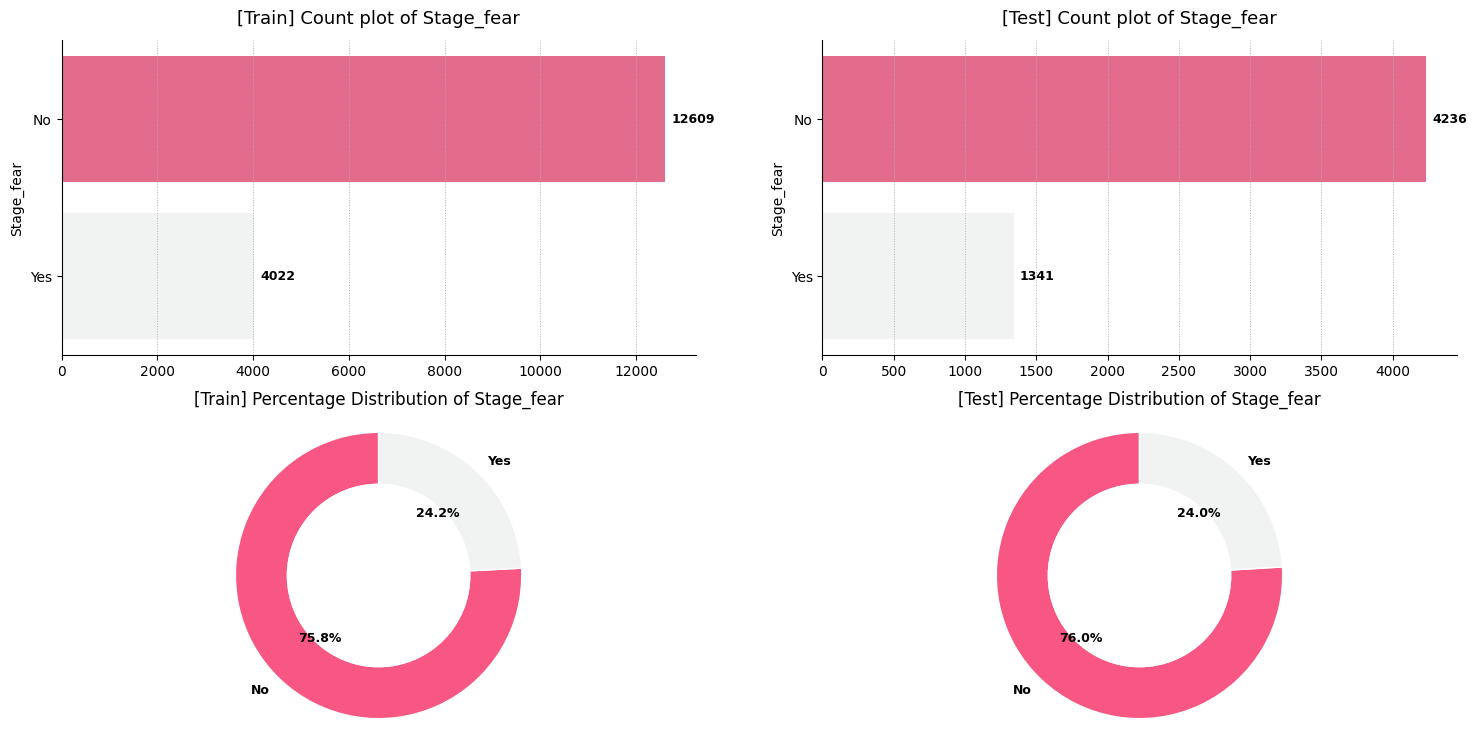

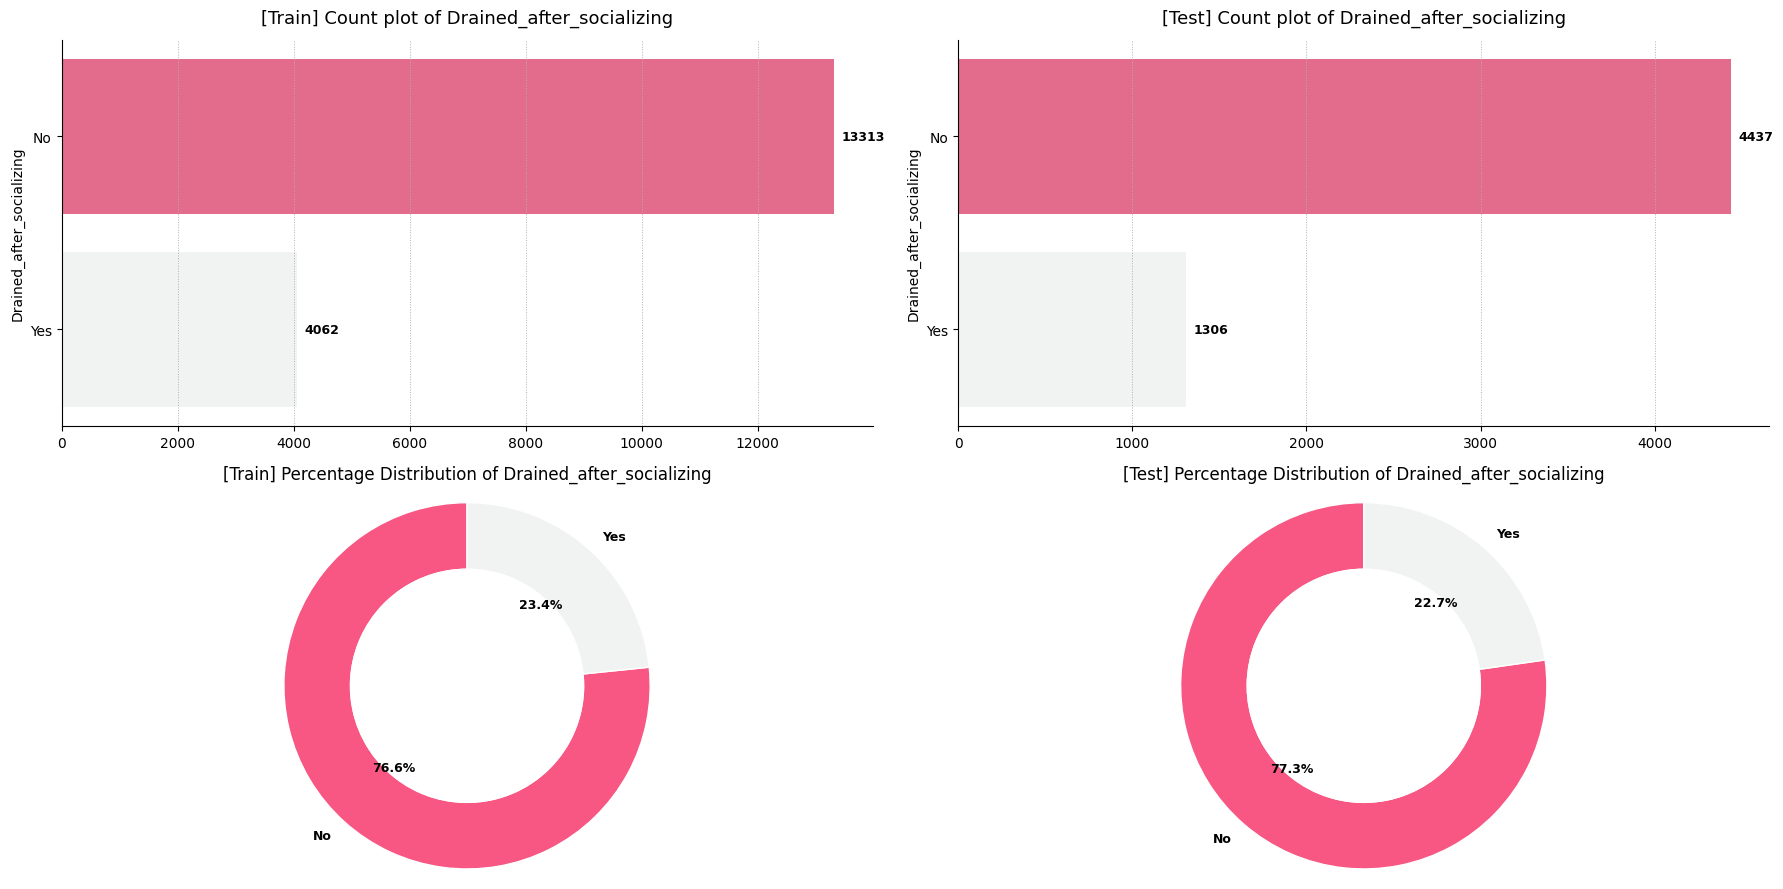

In [220]:
plot_categorical_distribution_both(cat_features=cat_features, df_train = df_train, df_test = df_test)

In [221]:
def top_ratio(df_test = df_test, df_train = df_train, cat_features = cat_features):
    dataset_names = ["Train", "Test"]
    datasets = [df_train, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Consistency between training and testing:** <br>
- No feature distribution is greater than 99%.
- The distribution of values ​​of each feature is almost the same between train and test data, which is good for modeling and avoiding data drift.
- These are important features because they are able to help the model differentiate between different groups.

**Specific feature:** <br>
`Stage_Fear`: The ~24% rate of stage fear suggests that it’s a fairly common phenomenon—not rare at all.

`Drained_after_socializing`: Roughly 23% of participants feel drained after socializing → This reflects a meaningful occurrence of “social burnout” in modern life.

## Bivariate Analysis

,Personality,Count,Mean,Median,Std
1,Introvert,4544,7.051937,7.000000,2.645865
0,Extrovert,12790,1.747146,2.000000,1.537609


🔎 D’Agostino and Pearson Normality Test for 'Time_spent_Alone' across 'Personality' groups

 Group: Extrovert (n = 12790)
  Statistic : 4770.500
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4544)
  Statistic : 155.871
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Time_spent_Alone' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2813493.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Introvert' has a higher median 'Time_spent_Alone' than Group 'Extrovert'.


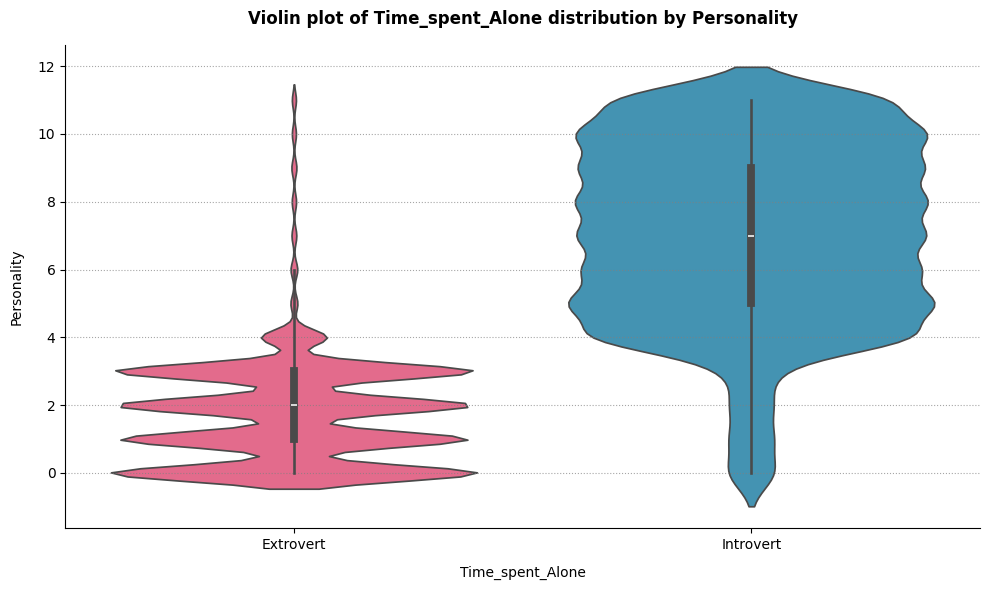

,Personality,Count,Mean,Median,Std
0,Extrovert,12967,6.389450,6.000000,2.020741
1,Introvert,4377,1.934202,2.000000,1.761425


🔎 D’Agostino and Pearson Normality Test for 'Social_event_attendance' across 'Personality' groups

 Group: Extrovert (n = 12967)
  Statistic : 545.494
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4377)
  Statistic : 1412.625
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Social_event_attendance' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 53792146.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Social_event_attendance' than Group 'Introvert'.


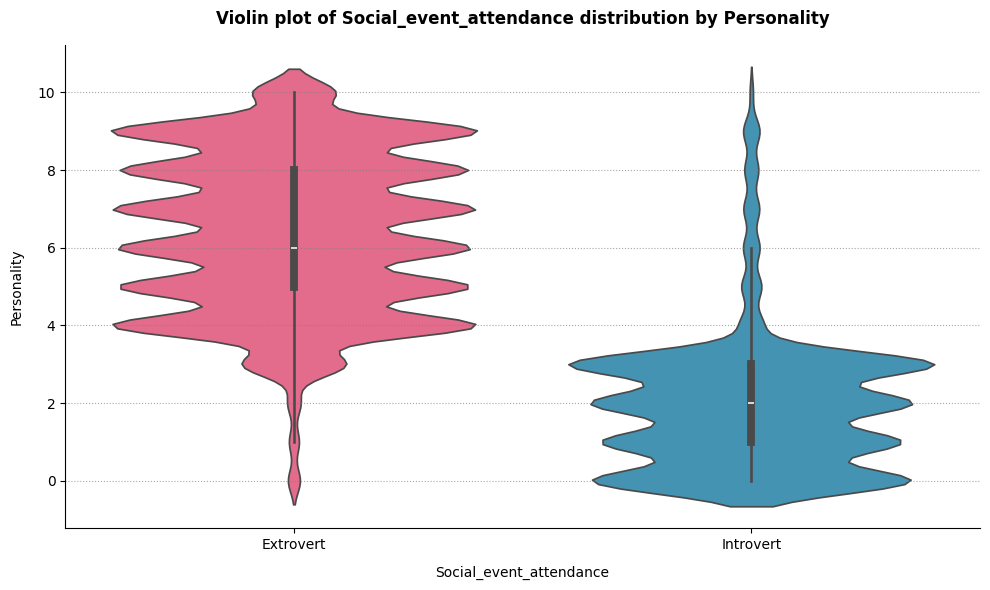

,Personality,Count,Mean,Median,Std
0,Extrovert,12737,4.895894,5.000000,1.434279
1,Introvert,4321,1.534136,1.000000,1.513918


🔎 D’Agostino and Pearson Normality Test for 'Going_outside' across 'Personality' groups

 Group: Extrovert (n = 12737)
  Statistic : 354.222
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4321)
  Statistic : 1099.783
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Going_outside' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 51552980.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Going_outside' than Group 'Introvert'.


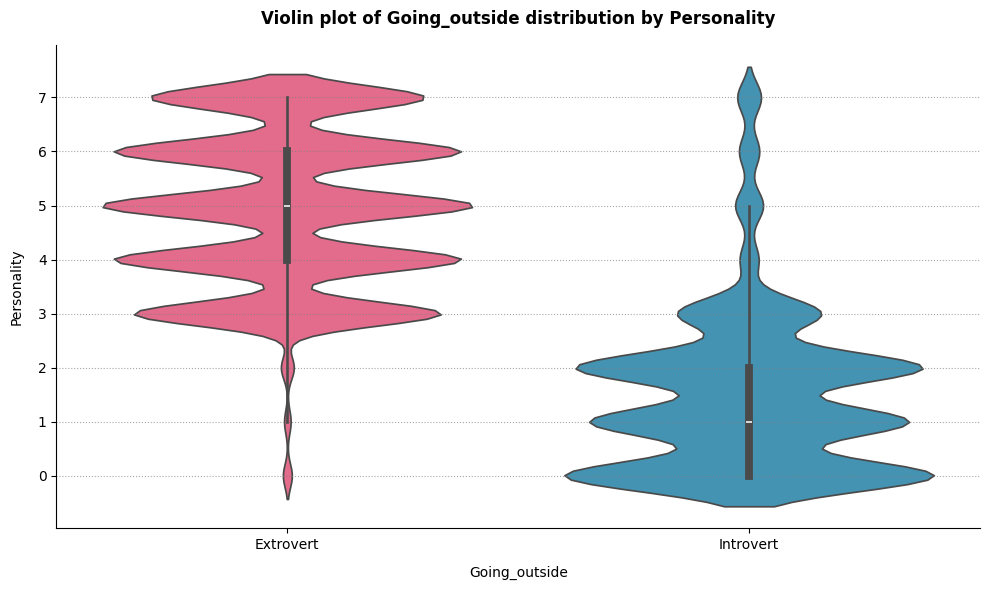

,Personality,Count,Mean,Median,Std
0,Extrovert,12999,9.624587,10.000000,3.347242
1,Introvert,4471,3.263923,3.000000,2.649747


🔎 D’Agostino and Pearson Normality Test for 'Friends_circle_size' across 'Personality' groups

 Group: Extrovert (n = 12999)
  Statistic : 2006.337
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4471)
  Statistic : 1728.765
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Friends_circle_size' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 54214346.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Friends_circle_size' than Group 'Introvert'.


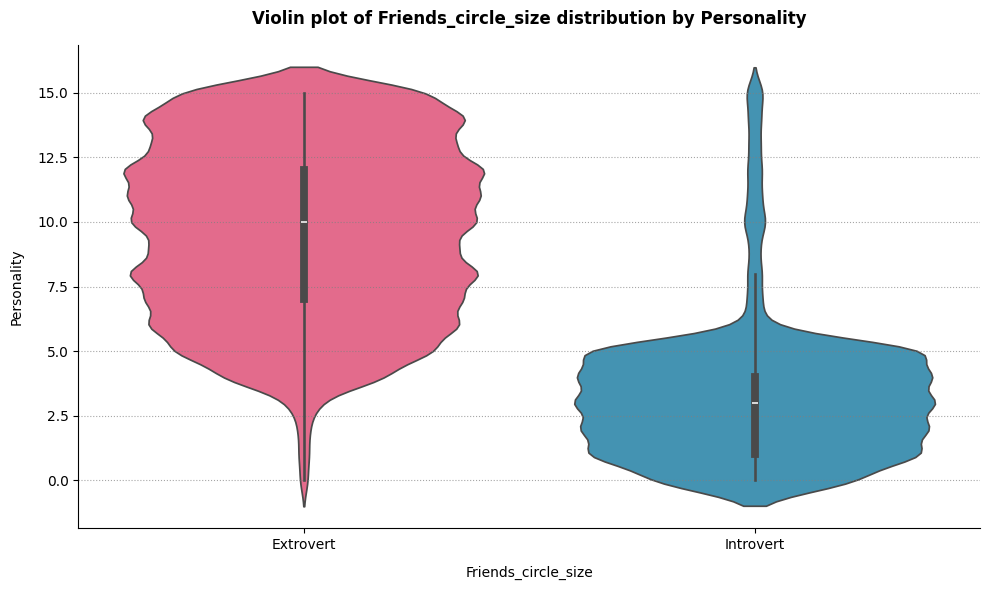

,Personality,Count,Mean,Median,Std
0,Extrovert,12922,6.113682,6.000000,2.225713
1,Introvert,4338,1.611342,1.000000,1.746218


🔎 D’Agostino and Pearson Normality Test for 'Post_frequency' across 'Personality' groups

 Group: Extrovert (n = 12922)
  Statistic : 2151.996
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4338)
  Statistic : 1924.005
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Post_frequency' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 52952409.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Post_frequency' than Group 'Introvert'.


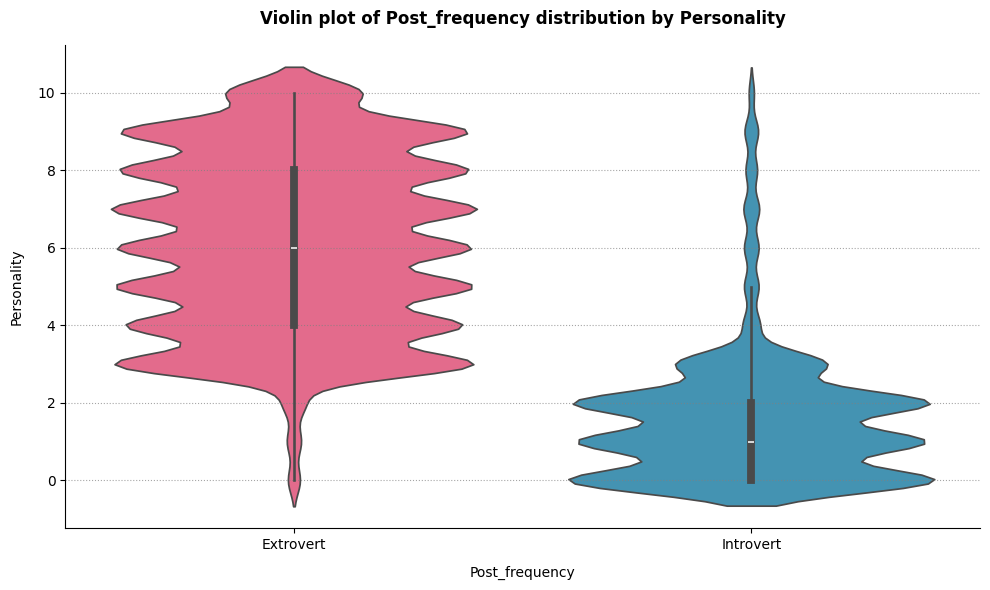

In [222]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = "Personality"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Personality(feature, df_train = df_train, target_feature = "Personality", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Personality</b></h2>"))
    plot_numerical_distribution_by_Personality(feature=feature)

### Insight Numerical Features by Personality
Based on the results from **Mann–Whitney U Test**. All traits have statistically significant associations with Personality (p-value < 0.05)

`Time_spent_Alone` <br>
* The Introvert group has a higher median time spent alone than the Extrovert group. The violin plot suggests that the Introvert distribut.

-> The result aligns with common psychological understanding: introverts tend to recharge through solitude, while extroverts often seek social interaction to feel energized.

`Social_event_attendance` <br>
- Extroverts have a higher average frequency of going out and a wider distribution of their data. In contrast, introverts have a lower average frequency of going out and a narrower distribution—suggesting that they tend to go out less often.

-> This aligns well with established psychological theories: extroverts are more socially driven and stimulated by external environments, while introverts generally prefer quieter, familiar surroundings.

`Going_outside` <br>
- The Extrovert group displays a higher median and broader distribution—suggesting they go outside more frequently and with greater variability.
- The Introvert group has a lower median and tighter spread—indicating less frequent outdoor activity.

-> The result beautifully mirrors established psychological observations: extroverts are typically energized by external stimulation and social engagement, whereas introverts often find comfort in solitude or controlled environments.

`Friends_circle_size` <br>
- Extroverts have a higher median **Friend Circle Size** and wider distribution, which indicates they have friends outside of society.
- Introverts show a lower median **Friend Circle Size** and a narrower spread, which indicates they have fewer social friends.

-> This result resonates with widely accepted psychological insights: extroverts thrive on social interaction and tend to cultivate broad circles of friends, whereas introverts prefer deeper relationships with fewer people.

`Post_frequency`
- The Extrovert group shows a higher median post frequency and a broader distribution—indicating they post more often and with greater variability.
- The Introvert group reveals a lower median and a tighter spread—suggesting fewer and more consistent posting behaviors.

-> The data reinforces personality theory: extroverts tend to seek external engagement and may view social media as an extension of their social lives. Introverts, meanwhile, may use social platforms more deliberately or sparingly—perhaps prioritizing privacy or deeper one-on-one communication.

In [223]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Personality</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Personality
    grouped = df.groupby([cat, "Personality"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index
    
    percentages = percentages.reindex(columns=["Introvert", "Extrovert"])

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Personality by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Personality Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 0)
    ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Personality", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order, hue_order = ["Introvert", "Extrovert"])
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Personality by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Personality", bbox_to_anchor=(1.05, 1), loc="upper left")
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Personality", df=df, show_residuals=True)

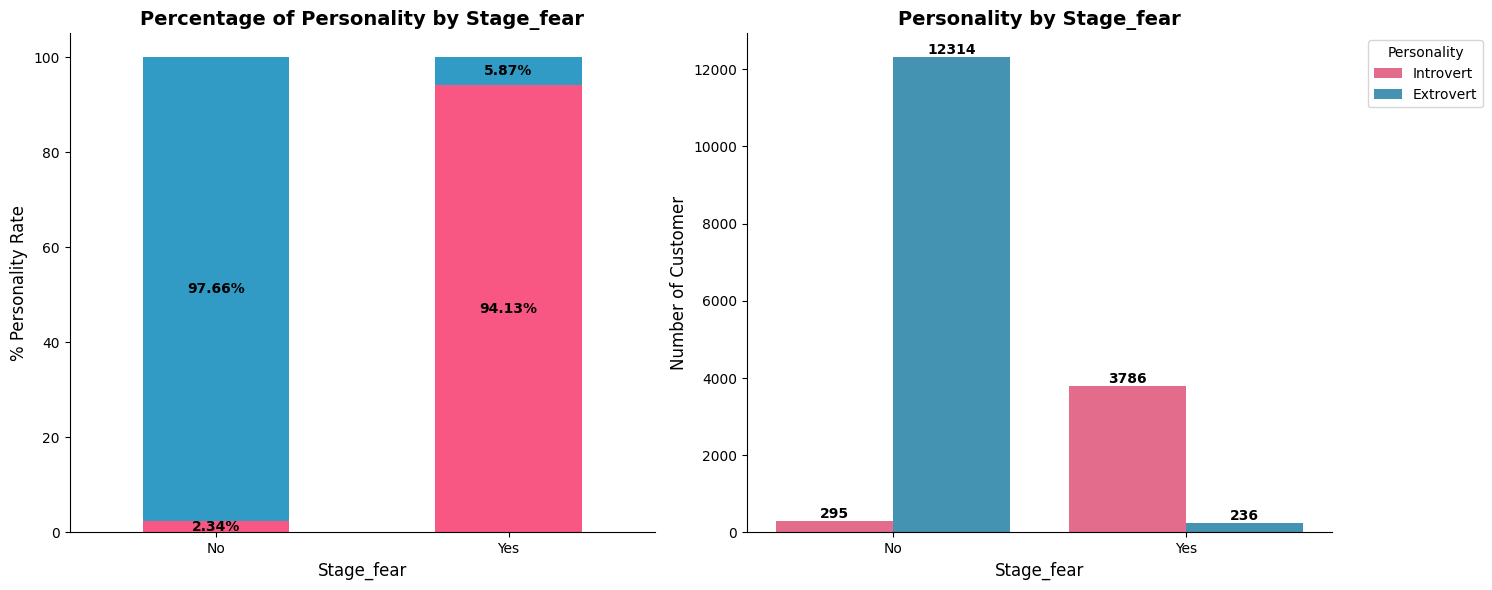


🔍 Chi-Square Test of Independence: 'Stage_fear' vs. 'Personality'
Chi-squared statistic: 13870.484
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Stage_fear' and 'Personality'.

📈 Standardized Residuals:
Personality  Extrovert  Introvert
Stage_fear                       
No               28.70     -50.32
Yes             -50.81      89.10


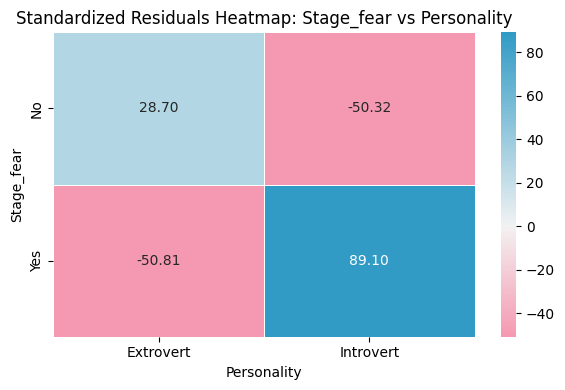

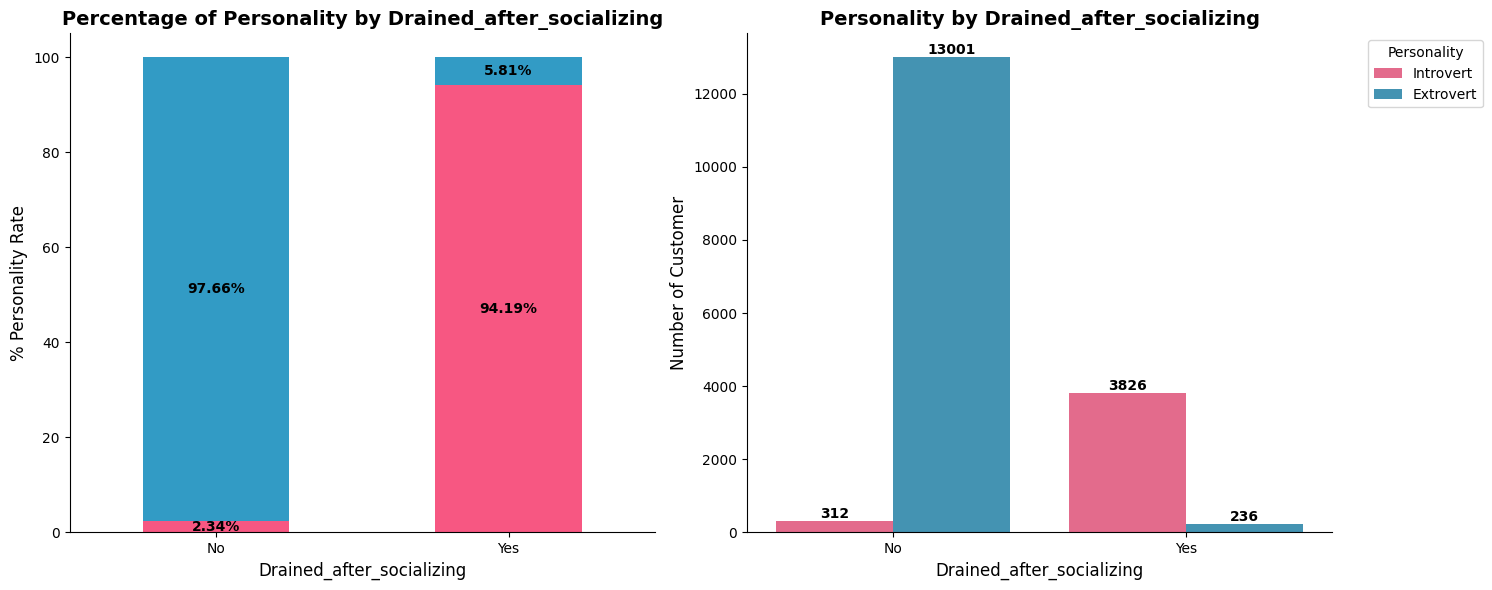


🔍 Chi-Square Test of Independence: 'Drained_after_socializing' vs. 'Personality'
Chi-squared statistic: 14465.509
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Drained_after_socializing' and 'Personality'.

📈 Standardized Residuals:
Personality                Extrovert  Introvert
Drained_after_socializing                      
No                             28.38     -50.77
Yes                           -51.39      91.91


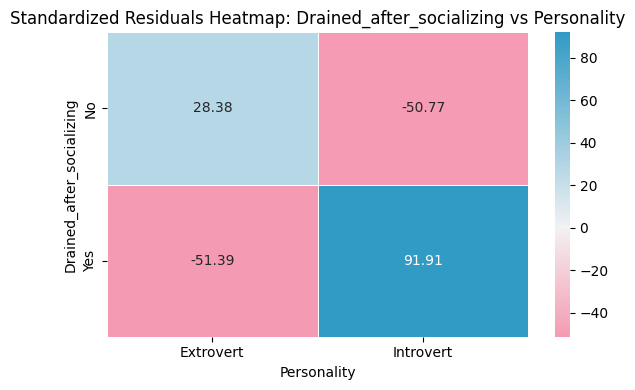

In [224]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features by Personality

**Strong Personality Signals Behind Social Behavior**

Both `Stage_fear` and `Drained_after_socializing` show extremely strong associations with `Personality` type:

**Stage\_fear:**

* **Yes**: 94.13% Introverts, 5.87% Extroverts
* **No**: 97.66% Extroverts, 2.34% Introverts
* **Standardized Residuals**:

  * Yes: +89.10 (Introvert), -50.81 (Extrovert)
  * No: +28.70 (Extrovert), -50.32 (Introvert)

**Drained\_after\_socializing:**

* **Yes**: 94.19% Introverts, 5.81% Extroverts
* **No**: 97.66% Extroverts, 2.34% Introverts
* **Standardized Residuals**:

  * Yes: +91.91 (Introvert), -51.39 (Extrovert)
  * No: +28.38 (Extrovert), -50.77 (Introvert)

These patterns reveal that **Introverts are far more likely to experience social exhaustion and stage fright**, while **Extroverts tend to thrive in social and public situations**.

The magnitude of standardized residuals confirms the **strong predictive power** of these variables. This mirrors the kind of behavior seen in highly imbalanced classification problems like the [Bank Churn dataset](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn), where one feature (`Complain`) can almost dominate the prediction. While highly informative, such features also raise concerns about **overfitting** and the **need for careful model validation**.

## Analyze the phenomenon "Missing Value"

**Analysis of the "Missing Value" Phenomenon**

Missing values are a common issue in real-world datasets and can significantly affect the performance of a machine learning model if not handled properly. In this dataset, several features contain missing values — both numerical and categorical — and understanding their patterns is crucial.

**Nature of Missingness:**

* A Chi-squared test was performed to determine the relationship between the missing values of key categorical features (`Stage_fear`and `Drained_after_socializing`) and target feature `Personality`.
* The results indicated **strong associations**, suggesting that the missing data is **not Missing Completely At Random (MCAR)**.

**Imputation Strategy:**

Since the missing values are **not MCAR**, we should **avoid using simple imputations** such as **mode** for categorical features without justification, as it may introduce bias.

**Numerical Features**:

We can use central tendency measures:

* **Mean**: suitable if the data is normally distributed.
* **Median**: preferred when the data is skewed or contains outliers.
* **Mode**: used when the most frequent value has significance.

**Categorical Features**:

* **"Missing" as a category**: in some cases, missingness may carry meaning and should be preserved as a separate category.

**Summary:**

The missingness is not entirely random, and careless imputation could distort the underlying relationships, especially for behavior-based features. A thoughtful imputation approach — tailored to the observed patterns — is critical to preserve data integrity and model fairness.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Missing Value

In [225]:
# Handling missing value for numerical features
num_features = ["Social_event_attendance",  "Going_outside",  "Friends_circle_size",  "Post_frequency",  "Time_spent_Alone"]
for feature in num_features:
    median_train = df_train[feature].median()
    df_train[feature].fillna(median_train, inplace=True)
    print(f"Imputed missing values in {feature} with median for train datat: {median_train:.2f}")

    median_test = df_test[feature].median()
    df_test[feature].fillna(median_test, inplace=True)
    print(f"Imputed missing values in {feature} with median for test data: {median_test:.2f}\n")

Imputed missing values in Social_event_attendance with median for train datat: 5.00
Imputed missing values in Social_event_attendance with median for test data: 5.00

Imputed missing values in Going_outside with median for train datat: 4.00
Imputed missing values in Going_outside with median for test data: 4.00

Imputed missing values in Friends_circle_size with median for train datat: 8.00
Imputed missing values in Friends_circle_size with median for test data: 8.00

Imputed missing values in Post_frequency with median for train datat: 5.00
Imputed missing values in Post_frequency with median for test data: 5.00

Imputed missing values in Time_spent_Alone with median for train datat: 2.00
Imputed missing values in Time_spent_Alone with median for test data: 2.00



In [226]:
# Handling missing value for categorical features
for feature in cat_features:
    df_train[feature].fillna("Missing", inplace=True)
    df_test[feature].fillna("Missing", inplace=True)
    print(f"Filled missing values in {feature} with 'Missing'")

Filled missing values in Stage_fear with 'Missing'
Filled missing values in Drained_after_socializing with 'Missing'


In [227]:
# Check for remaining missing values
print("Remaining Missing Values After Preprocessing (Train):")
display(df_train.isnull().sum())
print("Remaining Missing Values After Preprocessing (Test):")
display(df_test.isnull().sum())

Remaining Missing Values After Preprocessing (Train):


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Remaining Missing Values After Preprocessing (Test):


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

## Feature Engineering

In [228]:
le_stage = LabelEncoder()
le_drained = LabelEncoder()

df_train["Stage_fear"] = le_stage.fit_transform(df_train["Stage_fear"])
df_train["Drained_after_socializing"] = le_drained.fit_transform(df_train["Drained_after_socializing"])

df_test["Stage_fear"] = le_stage.fit_transform(df_test["Stage_fear"])
df_test["Drained_after_socializing"] = le_drained.fit_transform(df_test["Drained_after_socializing"])

In [229]:
#  Refer: https://www.kaggle.com/code/yeonseokcho/introvert-extrovert-knn-imputer/notebook#5.-Generation-features
# 1. Social media activity score
df_train["Social_Activity_Score"] = (df_train["Post_frequency"] * 
                                             df_train["Social_event_attendance"])

# 2. Stage_fear "Yes" plus Drained_after_socializing "Yes"
df_train["Fear_and_Drained"] = (df_train["Stage_fear"] + 
                                        df_train["Drained_after_socializing"])

# 3. Product of social event attendance and going outside 
df_train["Event_Outside_Product"] = (df_train["Social_event_attendance"] * 
                                             df_train["Going_outside"])

# 4. Whether the person has many friends 
df_train["Many_Friends"] = (df_train["Friends_circle_size"] > 
                                    df_train["Friends_circle_size"].median()).astype(int)

# 5. Whether the person spends a lot of time alone
df_train["Much_Alone"] = (df_train["Time_spent_Alone"] > 
                                  df_train["Time_spent_Alone"].median()).astype(int)

# 6. Whether the person is an active poster on social media 
df_train["Active_Poster"] = (df_train["Post_frequency"] > 
                                    df_train["Post_frequency"].median()).astype(int)

# 7. Extroversion score 
df_train["Extroversion_Score"] = (df_train["Social_event_attendance"] + 
                                          df_train["Going_outside"] + 
                                          df_train["Friends_circle_size"] + 
                                          df_train["Post_frequency"] - 
                                          df_train["Time_spent_Alone"] - 
                                          5 * df_train["Stage_fear"] - 
                                          5 * df_train["Drained_after_socializing"])

In [230]:
#  Refer: https://www.kaggle.com/code/yeonseokcho/introvert-extrovert-knn-imputer/notebook#5.-Generation-features
# 1. Social media activity score
df_test["Social_Activity_Score"] = (df_test["Post_frequency"] * 
                                             df_test["Social_event_attendance"])

# 2. Stage_fear_enc "Yes" plus Drained_after_socializing_enc "Yes"
df_test["Fear_and_Drained"] = (df_test["Stage_fear"] + 
                                        df_test["Drained_after_socializing"])

# 3. Product of social event attendance and going outside 
df_test["Event_Outside_Product"] = (df_test["Social_event_attendance"] * 
                                             df_test["Going_outside"])

# 4. Whether the person has many friends 
df_test["Many_Friends"] = (df_test["Friends_circle_size"] > 
                                    df_test["Friends_circle_size"].median()).astype(int)

# 5. Whether the person spends a lot of time alone
df_test["Much_Alone"] = (df_test["Time_spent_Alone"] > 
                                  df_test["Time_spent_Alone"].median()).astype(int)

# 6. Whether the person is an active poster on social media 
df_test["Active_Poster"] = (df_test["Post_frequency"] > 
                                    df_test["Post_frequency"].median()).astype(int)

# 7. Extroversion score 
df_test["Extroversion_Score"] = (df_test["Social_event_attendance"] + 
                                          df_test["Going_outside"] + 
                                          df_test["Friends_circle_size"] + 
                                          df_test["Post_frequency"] - 
                                          df_test["Time_spent_Alone"] - 
                                          5 * df_test["Stage_fear"] - 
                                          5 * df_test["Drained_after_socializing"])

In [231]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_Activity_Score,Fear_and_Drained,Event_Outside_Product,Many_Friends,Much_Alone,Active_Poster,Extroversion_Score
0,0.0,1,6.0,4.0,1,15.0,5.0,Extrovert,30.0,2,24.0,1,0,0,20.0
1,1.0,1,7.0,3.0,1,10.0,8.0,Extrovert,56.0,2,21.0,1,0,1,17.0
2,6.0,2,1.0,0.0,0,3.0,0.0,Introvert,0.0,2,0.0,0,1,0,-12.0
3,3.0,1,7.0,3.0,1,11.0,5.0,Extrovert,35.0,2,21.0,1,1,0,13.0
4,1.0,1,4.0,4.0,1,13.0,5.0,Extrovert,20.0,2,16.0,1,0,0,15.0



Test Data Preview:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_Activity_Score,Fear_and_Drained,Event_Outside_Product,Many_Friends,Much_Alone,Active_Poster,Extroversion_Score
0,3.0,1,7.0,4.0,1,6.0,5.0,35.0,2,28.0,0,1,0,9.0
1,2.0,2,0.0,0.0,2,5.0,1.0,0.0,4,0.0,0,0,0,-16.0
2,3.0,1,5.0,6.0,1,15.0,9.0,45.0,2,30.0,1,1,1,22.0
3,3.0,1,4.0,4.0,1,5.0,6.0,24.0,2,16.0,0,1,1,6.0
4,9.0,2,1.0,2.0,2,1.0,1.0,1.0,4,2.0,0,1,0,-24.0


### Numerical Features by Personality

We will re-examine the relationship between new features and Personality.

,Personality,Count,Mean,Median,Std
0,Extrovert,13699,38.683189,36.000000,19.001827
1,Introvert,4825,5.459689,2.000000,10.992237


🔎 D’Agostino and Pearson Normality Test for 'Social_Activity_Score' across 'Personality' groups

 Group: Extrovert (n = 13699)
  Statistic : 756.476
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4825)
  Statistic : 3879.093
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Social_Activity_Score' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 63005004.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Social_Activity_Score' than Group 'Introvert'.


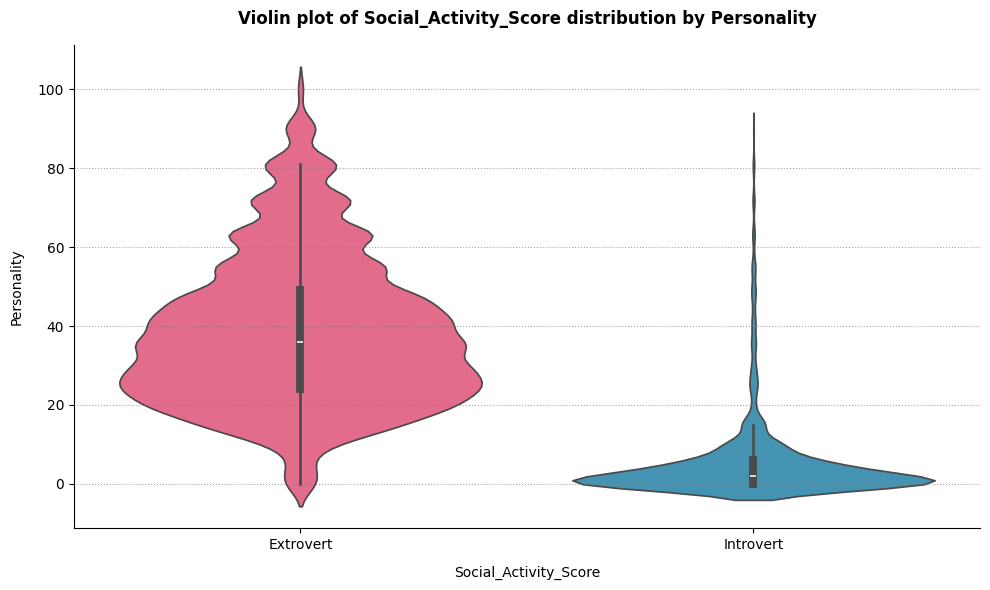

,Personality,Count,Mean,Median,Std
0,Extrovert,13699,30.795606,28.000000,13.355134
1,Introvert,4825,4.903005,2.000000,9.198211


🔎 D’Agostino and Pearson Normality Test for 'Event_Outside_Product' across 'Personality' groups

 Group: Extrovert (n = 13699)
  Statistic : 524.795
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4825)
  Statistic : 3557.016
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Event_Outside_Product' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 62877702.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Event_Outside_Product' than Group 'Introvert'.


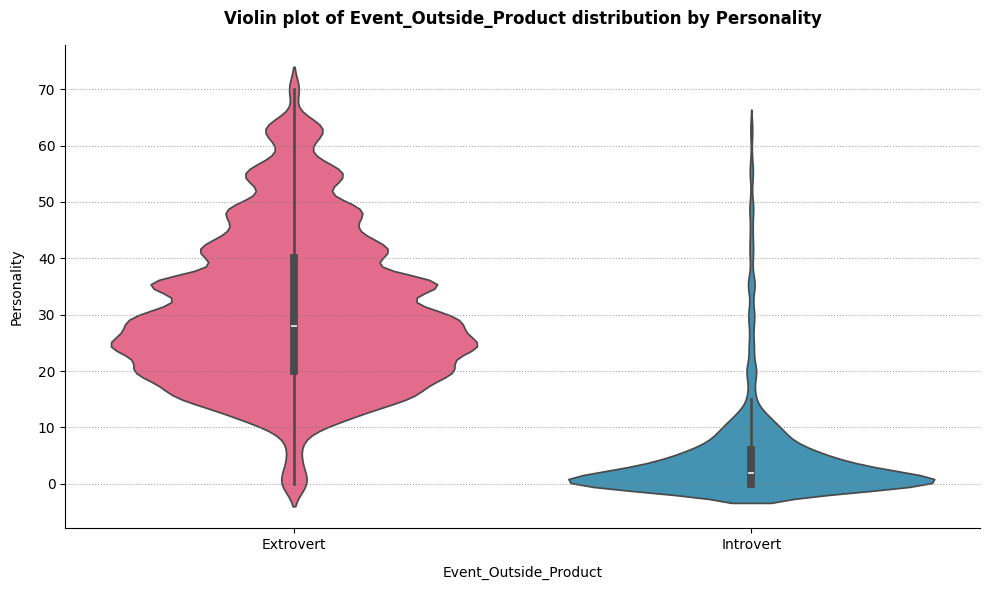

,Personality,Count,Mean,Median,Std
0,Extrovert,13699,15.392072,16.000000,6.691430
1,Introvert,4825,-13.587565,-15.000000,9.521178


🔎 D’Agostino and Pearson Normality Test for 'Extroversion_Score' across 'Personality' groups

 Group: Extrovert (n = 13699)
  Statistic : 6276.068
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Introvert (n = 4825)
  Statistic : 1998.007
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Extroversion_Score' by 'Personality'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 63201311.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Extrovert' has a higher median 'Extroversion_Score' than Group 'Introvert'.


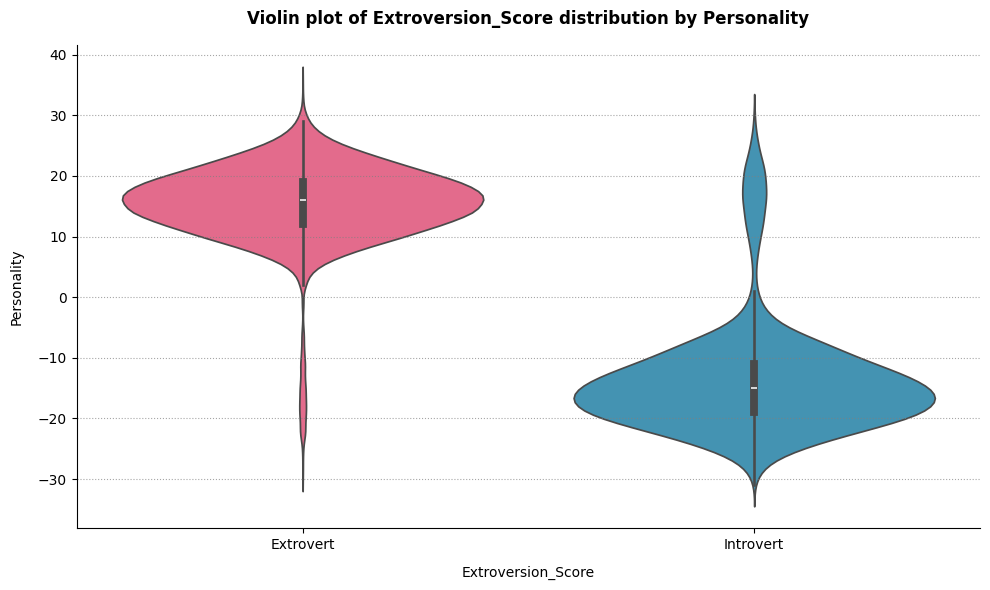

In [232]:
list_new_features = ["Social_Activity_Score", "Event_Outside_Product", "Extroversion_Score"]
for feature in list_new_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Personality</b></h2>"))
    plot_numerical_distribution_by_Personality(feature=feature)

#### Insight Numerical Features by Personality

`Social_Activity_Score`

- The **Extrovert** group shows a significantly higher median score compared to the **Introvert** group.
- Statistical testing reveals a **U statistic of 63,005,004.0** and a **p-value of 0.0**, indicating the difference between the two groups is **statistically significant** → rejecting the null hypothesis.
- This implies that **extroverted individuals tend to engage in more social activities than introverted individuals**.

`Event_Outside_Product`

- The **Extrovert** group clearly shows a higher median score than the **Introvert** group.
- The statistical result indicates a **significant difference** between the two (p-value = 0.0), meaning the null hypothesis is rejected.
- Interpretation: **Extroverted individuals tend to participate more in events** compared to introverts.

`Extroversion_Score` 

- The **Extrovert** group clearly demonstrates a higher median score compared to the **Introvert** group, indicating greater levels of extroversion.
- Statistical analysis shows a **significant difference** between the two groups (p-value = 0.0), leading to a **rejection of the null hypothesis**.
- Interpretation: **Extroverted individuals tend to score higher on extroversion metrics than introverted individuals.**

### Categorical Features by Personality

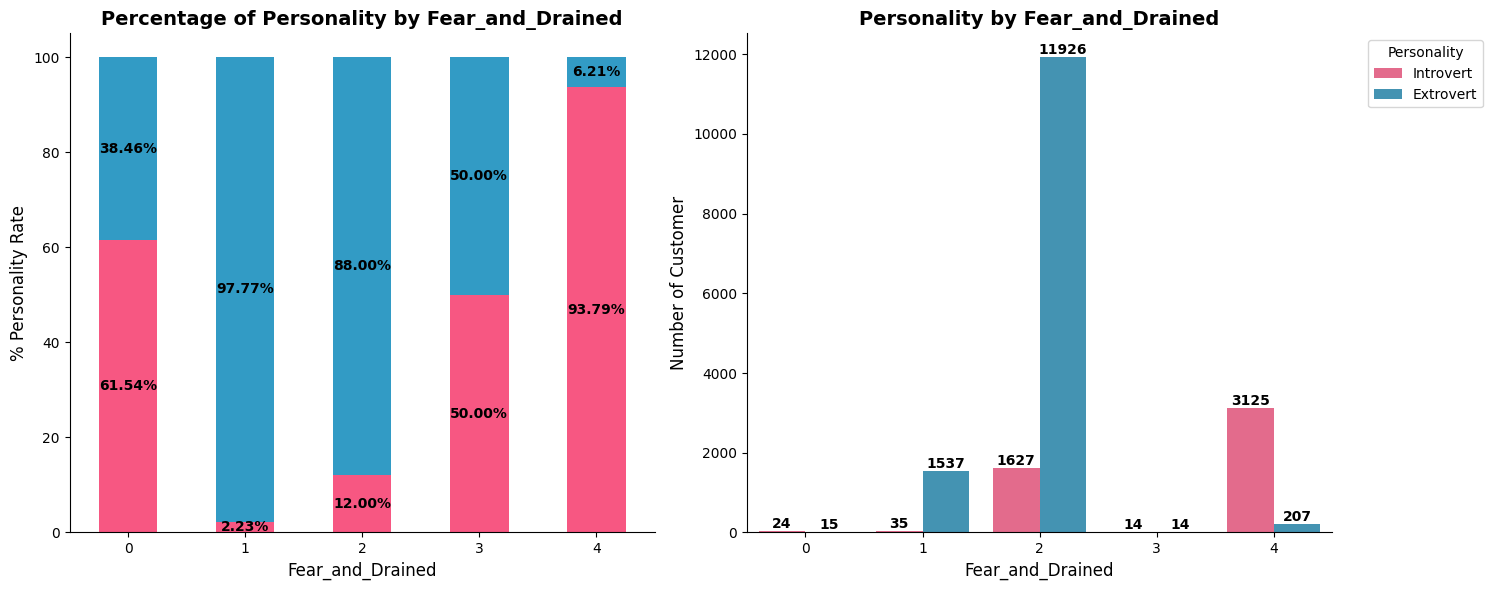


🔍 Chi-Square Test of Independence: 'Fear_and_Drained' vs. 'Personality'
Chi-squared statistic: 9821.810
Degrees of freedom: 4
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Fear_and_Drained' and 'Personality'.

📈 Standardized Residuals:
Personality       Extrovert  Introvert
Fear_and_Drained                      
0                     -2.58       4.34
1                     10.98     -18.51
2                     19.01     -32.03
3                     -1.47       2.48
4                    -45.47      76.62


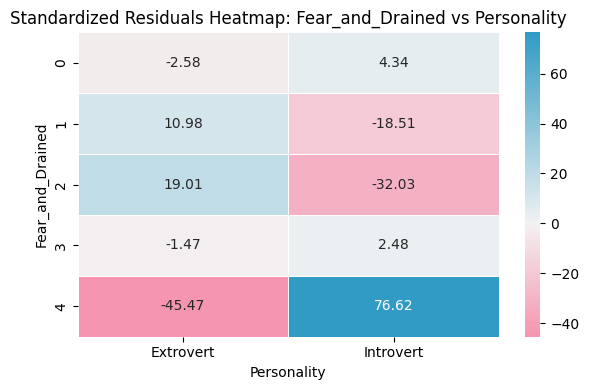

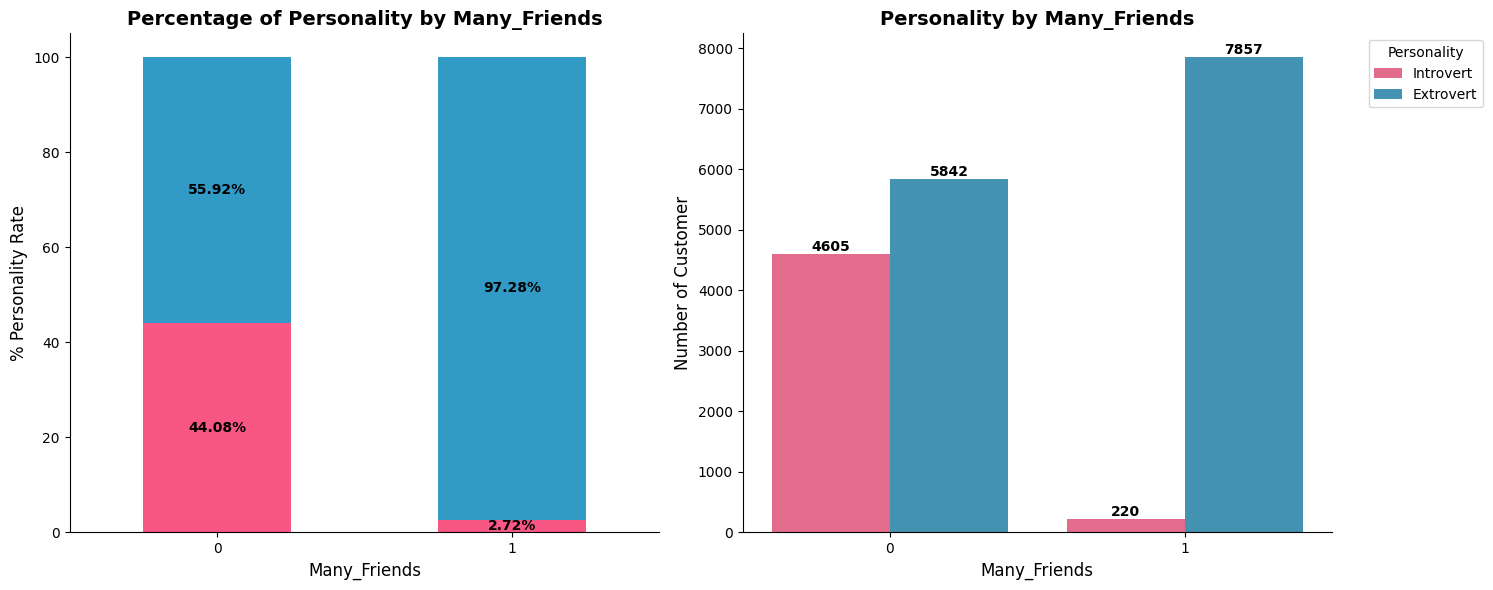


🔍 Chi-Square Test of Independence: 'Many_Friends' vs. 'Personality'
Chi-squared statistic: 4042.348
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Many_Friends' and 'Personality'.

📈 Standardized Residuals:
Personality   Extrovert  Introvert
Many_Friends                      
0                -21.43      36.11
1                 24.37     -41.07


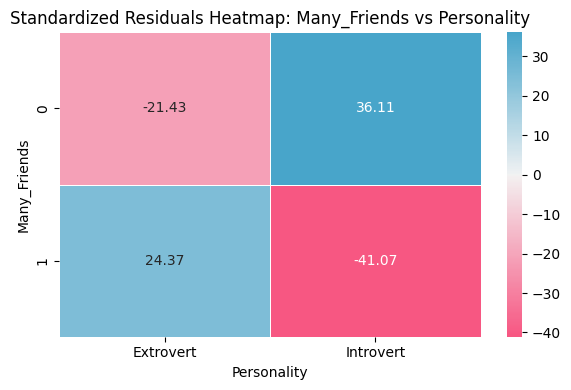

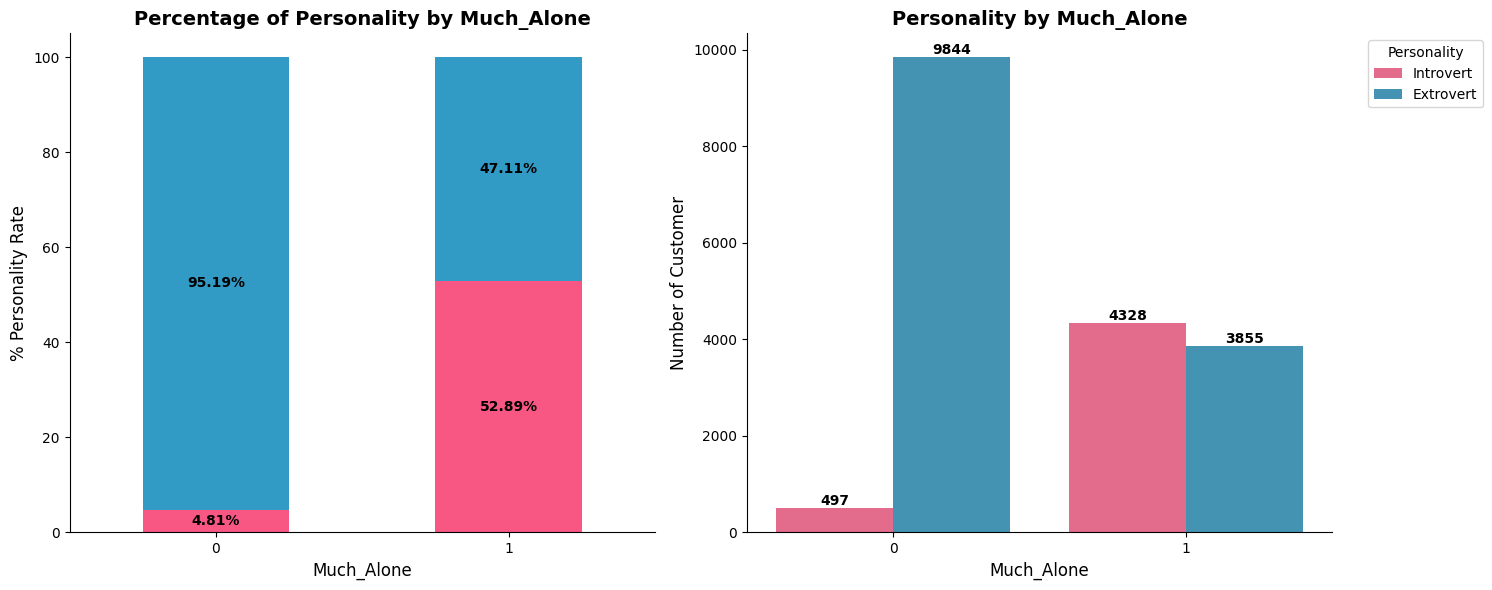


🔍 Chi-Square Test of Independence: 'Much_Alone' vs. 'Personality'
Chi-squared statistic: 5480.594
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Much_Alone' and 'Personality'.

📈 Standardized Residuals:
Personality  Extrovert  Introvert
Much_Alone                       
0                25.12     -42.32
1               -28.24      47.58


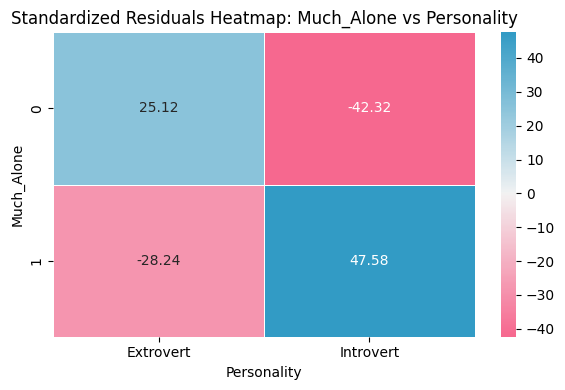

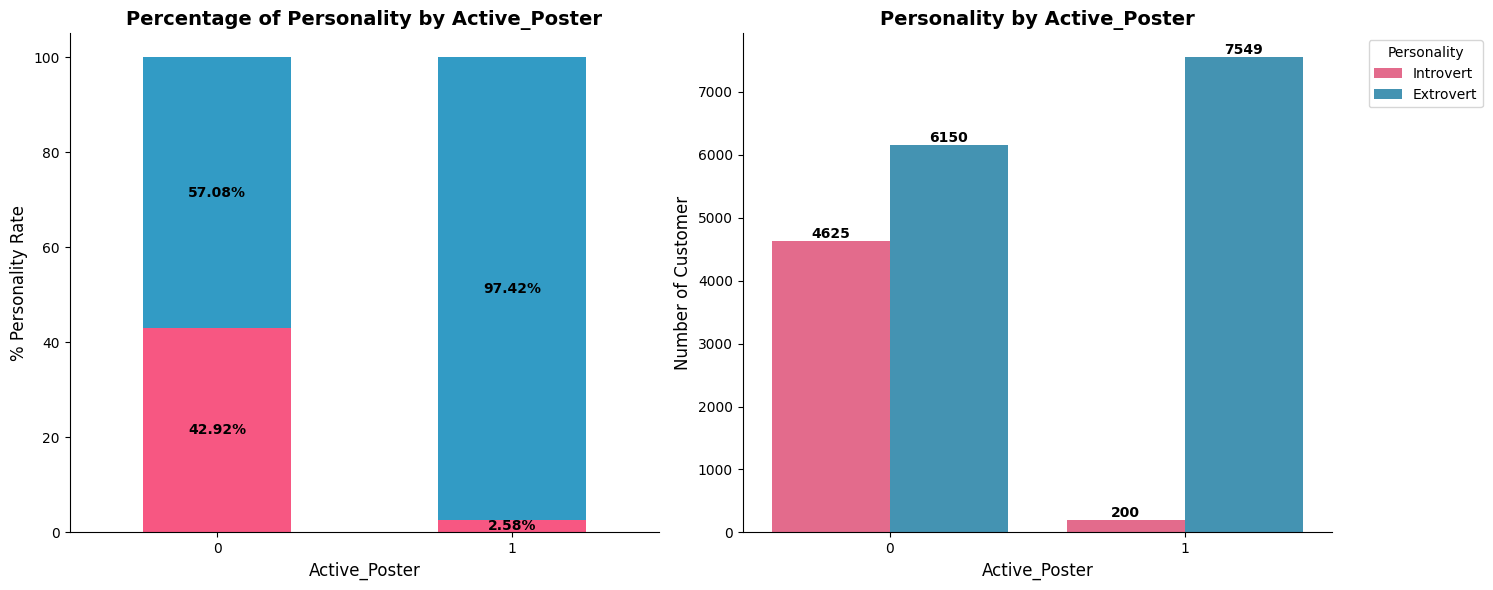


🔍 Chi-Square Test of Independence: 'Active_Poster' vs. 'Personality'
Chi-squared statistic: 3806.250
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Active_Poster' and 'Personality'.

📈 Standardized Residuals:
Personality    Extrovert  Introvert
Active_Poster                      
0                 -20.37      34.32
1                  24.02     -40.47


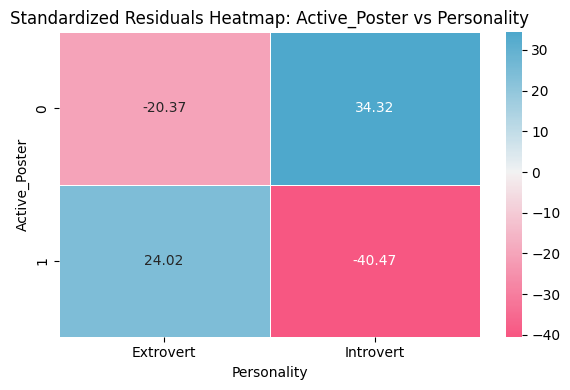

In [233]:
list_new_cat_features = ["Fear_and_Drained",  "Many_Friends", "Much_Alone", "Active_Poster"]
for feature in list_new_cat_features:
    bivariate_percent_plot(cat=feature, df= df_train)

#### Insight Categorical Features by Personality

`Fear_and_Drained`

- **Statistical Findings**: p-value = 0.000000 → **Statistically significant** → Null hypothesis (H₀) is rejected.
- This confirms a **notable association** between feelings of anxiety/exhaustion and personality traits.

- The **Introvert** group consistently shows **positive residuals**, especially at higher levels of Fear_and_Drained (e.g., level 4 with a residual of +76.62) → indicating that **introverts are more likely to feel anxious and drained**.
- Conversely, the **Extrovert** group shows **strong negative residuals** at the same level (e.g., −45.47 at level 4) → suggesting that **extroverts are less prone to such states**.

`Many_Friends`

- Individuals labeled **Introvert** tend to **not have many friends** more than expected (positive residual = +36.11).
- In contrast, **Extroverts** are **more likely to have many friends** (positive residual = +24.37).
- The heatmap clearly visualizes this pattern using a color gradient from red (negative) to blue (positive).

`Much_Alone`

- **Introverts** are more likely than expected to feel alone frequently (positive residual = +47.58).
- **Extroverts**, on the other hand, are much less likely to experience that (negative residual = −28.24).

`Active_Poster`

- **Extroverts** tend to be more active posters than expected (residual = +24.02).
- **Introverts** are less likely to post actively (residual = −40.47).

## Handling Skewness

In [234]:
num_features.extend(list_new_features)

In [235]:
skew_feature_train, skew_train_df = check_skewness(data=df_train, dataset_name="Train Data", numerical_features=num_features)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Time_spent_Alone               |   +1.2274 | Highly skewed
Extroversion_Score             |   -0.9280 | Moderately skewed
Social_Activity_Score          |   +0.4963 | Approximately symmetric
Going_outside                  |   -0.3773 | Approximately symmetric
Event_Outside_Product          |   +0.2949 | Approximately symmetric
Social_event_attendance        |   -0.2177 | Approximately symmetric
Post_frequency                 |   -0.0621 | Approximately symmetric
Friends_circle_size            |   -0.0535 | Approximately symmetric
----------------------------------------------------------------------


In [236]:
skew_feature_test, skew_test_df = check_skewness(data=df_test, dataset_name="Test Data", numerical_features=num_features)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Time_spent_Alone               |   +1.2540 | Highly skewed
Extroversion_Score             |   -0.9537 | Moderately skewed
Social_Activity_Score          |   +0.4879 | Approximately symmetric
Going_outside                  |   -0.3548 | Approximately symmetric
Event_Outside_Product          |   +0.3151 | Approximately symmetric
Social_event_attendance        |   -0.2316 | Approximately symmetric
Post_frequency                 |   -0.0755 | Approximately symmetric
Friends_circle_size            |   -0.0666 | Approximately symmetric
----------------------------------------------------------------------


In [237]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           18524 non-null  float64
 1   Stage_fear                 18524 non-null  int64  
 2   Social_event_attendance    18524 non-null  float64
 3   Going_outside              18524 non-null  float64
 4   Drained_after_socializing  18524 non-null  int64  
 5   Friends_circle_size        18524 non-null  float64
 6   Post_frequency             18524 non-null  float64
 7   Personality                18524 non-null  object 
 8   Social_Activity_Score      18524 non-null  float64
 9   Fear_and_Drained           18524 non-null  int64  
 10  Event_Outside_Product      18524 non-null  float64
 11  Many_Friends               18524 non-null  int64  
 12  Much_Alone                 18524 non-null  int64  
 13  Active_Poster              18524 non-null  int

In [239]:
num_features = ["Social_event_attendance", "Going_outside", "Friends_circle_size",  "Post_frequency", 
                "PT_Time_spent_Alone",  "Social_Activity_Score", "Event_Outside_Product",  "PT_Extroversion_Score"]

In [240]:
processed_train_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_train, num_features=skew_feature_train)

skew_feature_train, skew_train_df = check_skewness(data=processed_train_df, numerical_features=num_features,
                                                   dataset_name= "Train data")


🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Social_Activity_Score          |   +0.4963 | Approximately symmetric
PT_Extroversion_Score          |   -0.4503 | Approximately symmetric
Going_outside                  |   -0.3773 | Approximately symmetric
Event_Outside_Product          |   +0.2949 | Approximately symmetric
Social_event_attendance        |   -0.2177 | Approximately symmetric
Post_frequency                 |   -0.0621 | Approximately symmetric
Friends_circle_size            |   -0.0535 | Approximately symmetric
PT_Time_spent_Alone            |   -0.0046 | Approximately symmetric
----------------------------------------------------------------------


In [241]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test, dataset="Test data")

skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features,
                                                   dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Social_Activity_Score          |   +0.4879 | Approximately symmetric
PT_Extroversion_Score          |   -0.4517 | Approximately symmetric
Going_outside                  |   -0.3548 | Approximately symmetric
Event_Outside_Product          |   +0.3151 | Approximately symmetric
Social_event_attendance        |   -0.2316 | Approximately symmetric
Post_frequency                 |   -0.0755 | Approximately symmetric
Friends_circle_size            |   -0.0666 | Approximately symmetric
PT_Time_spent_Alone            |   -0.0042 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_train_df` and `processed_test_df`):**

🔴 **Skewed**:

* Ony feature `Time_spent_Alone` and `Extroversion_Score` exhibit skewness.

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_Time_spent_Alone`and `Extroversion_Score` less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for this feature.

### Re-Checking Outlier

In [242]:
checking_outlier(list_feature=num_features, df=processed_train_df, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Social_Activity_Score,30,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]"


In [245]:
checking_outlier(list_feature=num_features, df=processed_test_df, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Social_Activity_Score,12,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]"
1,Event_Outside_Product,21,"[70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0]"


**Observations**

- The previous Outlier checking found that `Time_spent_Alone` had many outlier values, but after skew treatment, `Time_spent_Alone` no longer had any outliers. This shows that the Yeo-Johnson transformation was effective for this feature.

- We also re-examined the datasets for checking outliers.
- **The outliers** were found. But we can not remove them.
* Both **processed_train_df** and **processed_test_df** datasets contain **notable outliers** in `Social_Activity_Score` and `Event_Outside_Product`(only **processed_test_df**)

## Create Test Set

Suppose we chatted with experts who told us that the **Social_event_attendance** is a very important attribute to predict **Personality**. We may want to ensure that the test set is representative of the various categories of **Social_event_attendance** in the whole dataset. Since the **Social_event_attendance** is a continuous numerical attribute, we first need to create an income category attribute.

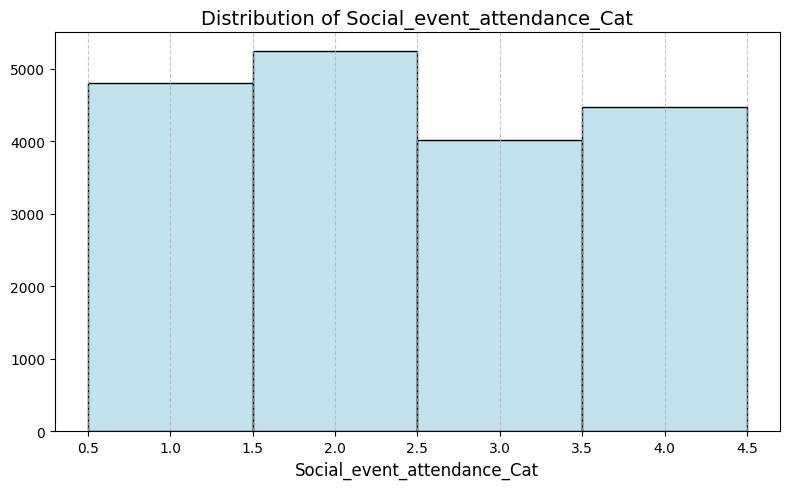

In [246]:
processed_train_df["Social_event_attendance_Cat"] = pd.qcut(processed_train_df["Social_event_attendance"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_train_df, x="Social_event_attendance_Cat", color="lightblue", edgecolor="black")

plt.title("Distribution of Social_event_attendance_Cat", fontsize=14)
plt.xlabel("Social_event_attendance_Cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [247]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_train_df, processed_train_df["Social_event_attendance_Cat"]):
    start_train_set = processed_train_df.iloc[train_index]
    start_test_set = processed_train_df.iloc[test_index]

## Scale

In [248]:
# Now we should remove the Social_event_attendance_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("Social_event_attendance_Cat", axis=1, inplace=True)

In [249]:
df_train_new = start_train_set.drop("Personality", axis=1)
df_train_label_new = start_train_set["Personality"].copy()

In [257]:
list_feature_num_robust = ["Social_Activity_Score","Event_Outside_Product"]
list_feature_num_stand = ["Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency", "PT_Time_spent_Alone", "PT_Extroversion_Score"]
list_feature_cat_onehot = ["Fear_and_Drained"]
list_feature_cat_keep = ["Stage_fear",  "Drained_after_socializing", "Many_Friends", "Much_Alone", "Active_Poster"]

In [258]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [259]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['Social_Activity_Score',
                                  'Event_Outside_Product']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Social_event_attendance', 'Going_outside',
                                  'Friends_circle_size', 'Post_frequency',
                                  'PT_Time_spent_Alone',
                                  'PT_Extroversion_Score']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Fear_and_Drained']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Stage_fear', 'Drained_after_socializing',
                                  'Many_Friends', 'Much_Alone',
                                  'Active_Poster'])])

In [260]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__Social_Activity_Score',
 'num_robust__Event_Outside_Product',
 'num_standard__Social_event_attendance',
 'num_standard__Going_outside',
 'num_standard__Friends_circle_size',
 'num_standard__Post_frequency',
 'num_standard__PT_Time_spent_Alone',
 'num_standard__PT_Extroversion_Score',
 'cat_onehot__Fear_and_Drained_0',
 'cat_onehot__Fear_and_Drained_1',
 'cat_onehot__Fear_and_Drained_2',
 'cat_onehot__Fear_and_Drained_3',
 'cat_onehot__Fear_and_Drained_4',
 'cat_keep__Stage_fear',
 'cat_keep__Drained_after_socializing',
 'cat_keep__Many_Friends',
 'cat_keep__Much_Alone',
 'cat_keep__Active_Poster']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [262]:
label = LabelEncoder()
df_train_label_new = label.fit_transform(df_train_label_new)

# Preview label encoding
print("Label Encoding Mapping:", dict(zip(label.classes_, label.transform(label.classes_))))

Label Encoding Mapping: {'Extrovert': np.int64(0), 'Introvert': np.int64(1)}


In [263]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_train_new_prepared, df_train_label_new)

In [265]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=42),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=seed, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=seed),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbosity=-1)
]

In [266]:
def generate_baseline_results(models = models, X = X_resampled, y = y_resampled,
                              metric = "accuracy", cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "accuracy_score"])

    # Summary
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="accuracy_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model Accuracy using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

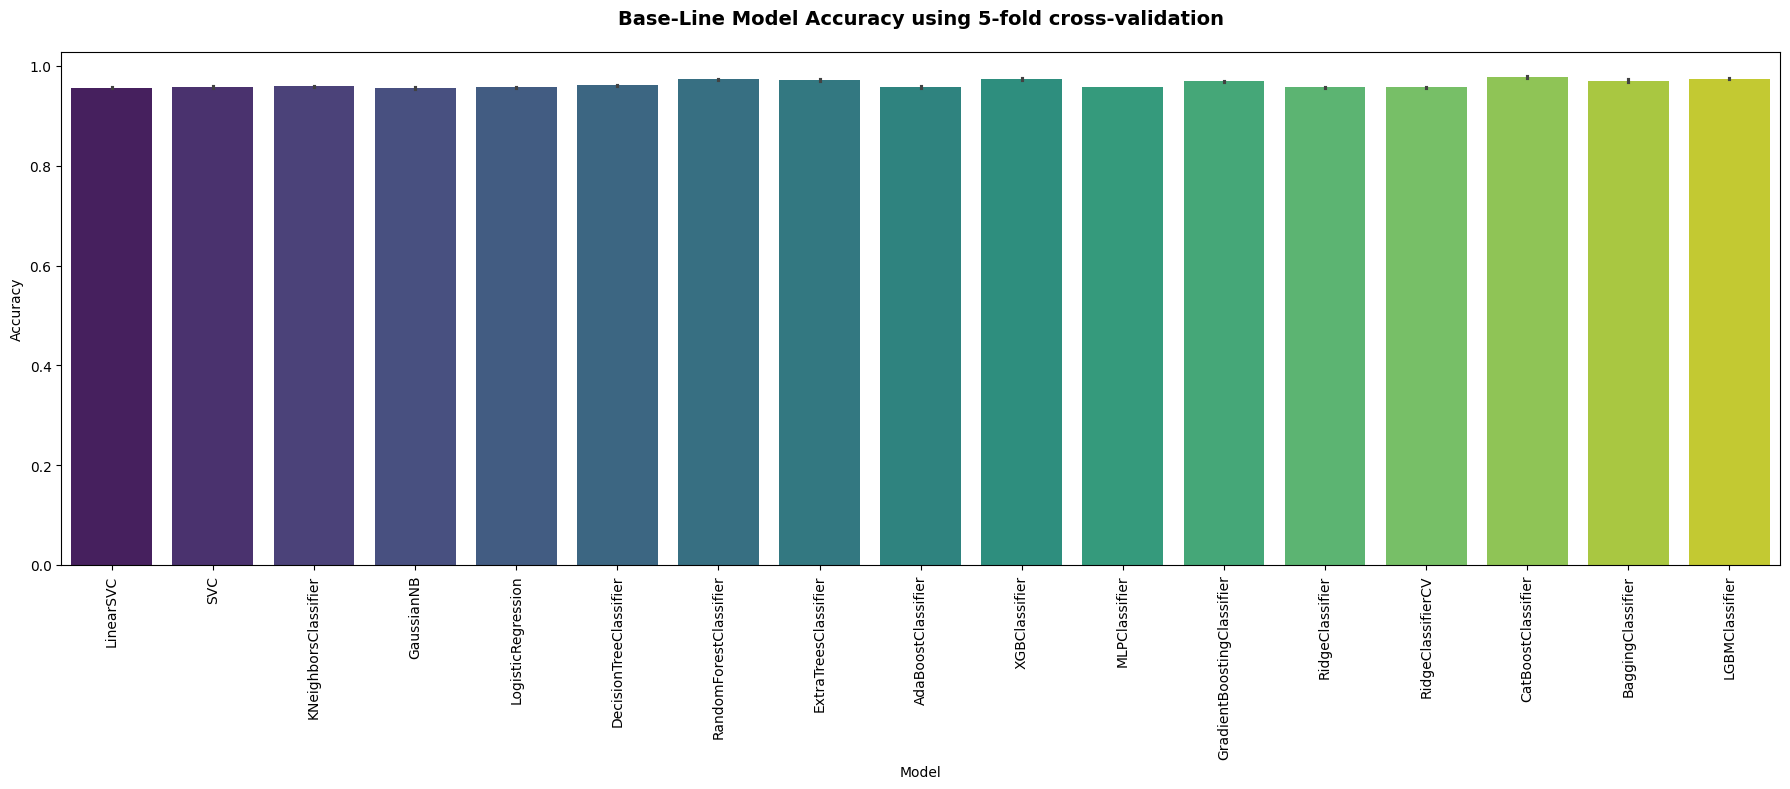

,Mean,Standard Deviation
model_name,,
CatBoostClassifier,0.977076,0.002565
LGBMClassifier,0.974615,0.002212
XGBClassifier,0.974250,0.002521
RandomForestClassifier,0.973020,0.001731
ExtraTreesClassifier,0.971242,0.003227
BaggingClassifier,0.970559,0.002721
GradientBoostingClassifier,0.969328,0.001355
DecisionTreeClassifier,0.961079,0.001607
KNeighborsClassifier,0.959165,0.001461


In [268]:
generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [269]:
def shap_plot(model, X_test, list_feature):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    shap.summary_plot(shap_values, X_test_sample)

In [270]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [271]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [272]:
X_val = start_test_set.drop("Personality", axis=1)
y_val = label.transform(start_test_set["Personality"].copy())
X_val_prepared = preprocessor.transform(X_val)

## CatBoostClassifier

In [273]:
def objective_cb(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 100, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "random_seed": seed,
        "task_type": "CPU"
    }

    model = CatBoostClassifier(**params)

    score = cross_val_score(
        model,
        X=X_resampled,
        y=y_resampled,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )
    return score.mean()

study_cb = optuna.create_study(direction="maximize")
study_cb.optimize(objective_cb, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [274]:
study_cb.best_value

0.9778963651774669

In [275]:
study_cb.best_params

{'iterations': 448,
 'learning_rate': 0.05112748279768565,
 'depth': 8,
 'l2_leaf_reg': 0.987885914486725,
 'random_strength': 0.007981971076463458,
 'bagging_temperature': 0.19250009228858922,
 'border_count': 143}

In [276]:
best_model_catboost = CatBoostClassifier(**study_cb.best_params, random_seed=seed, 
                                        early_stopping_rounds=20,
                                        eval_metric="Accuracy", verbose=0)
best_model_catboost

Evaluating CatBoostClassifier...


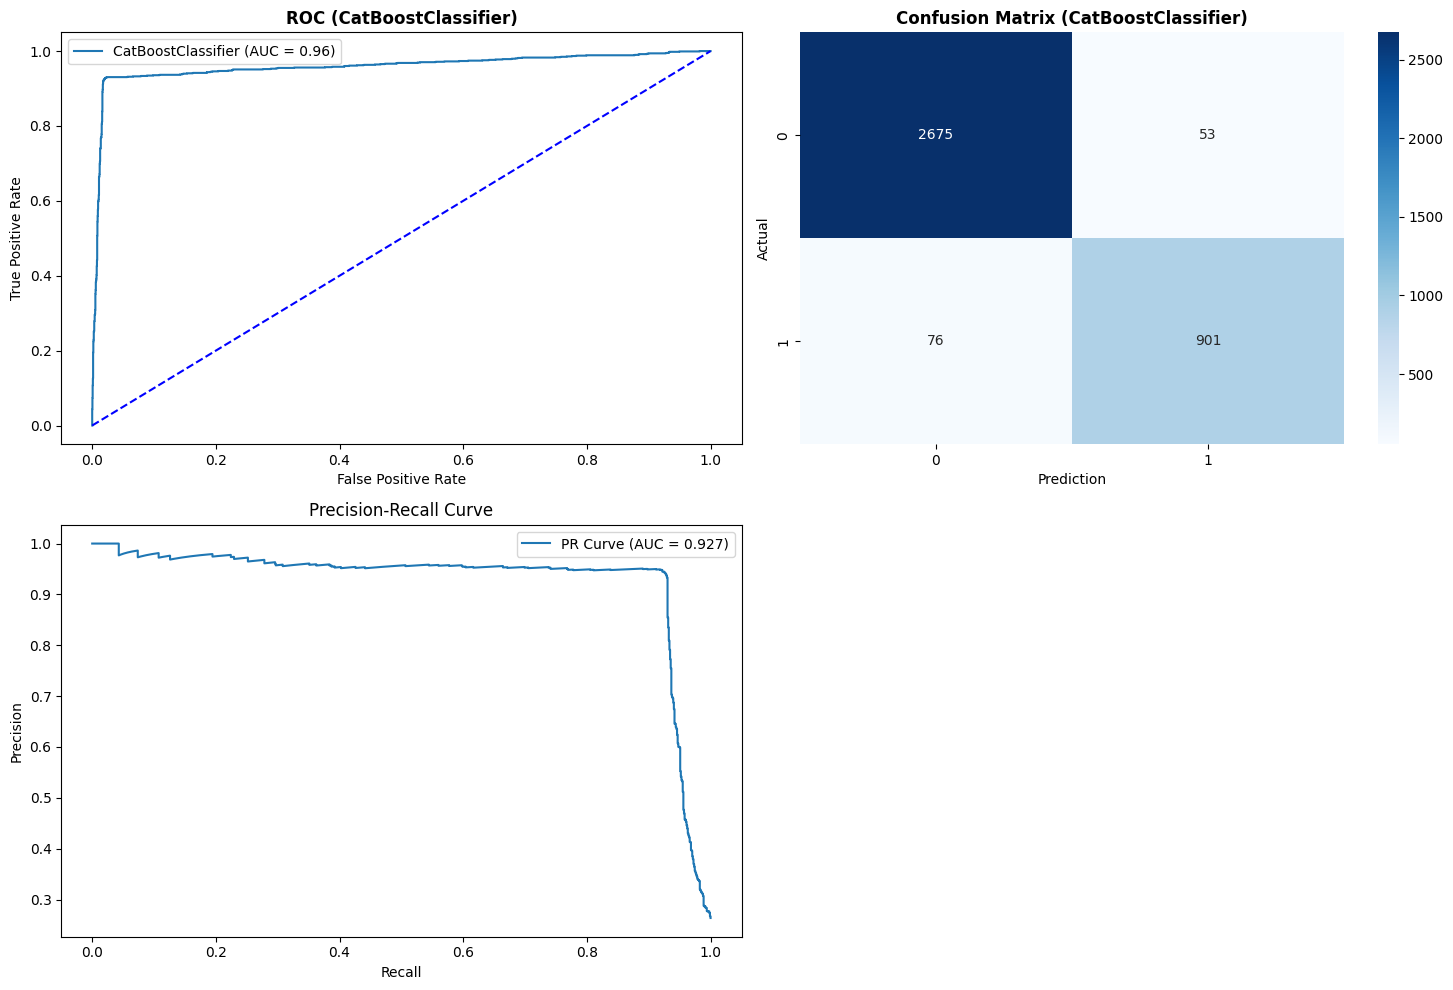

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.94      0.92      0.93       977

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.97      0.97      0.97      3705



In [ ]:
evaluate_model(model = best_model_catboost, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))


In [284]:
from sklearn.base import clone
best_model_catboost_clone = clone(best_model_catboost)

In [287]:
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

try:
    check_is_fitted(best_model_catboost_clone)
except NotFittedError:
    print("Clone does not fit ✅")

Clone does not fit ✅


## XGBClassifier

In [281]:
def objective_xgb(trial):
    params = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
    }

    model = XGBClassifier(**params, use_label_encoder=False, random_state=seed)
    score = cross_val_score(
        model,
        X=X_resampled,
        y=y_resampled,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )
    return score.mean()

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

In [282]:
study_xgb.best_value

0.9755720826056191

In [283]:
study_xgb.best_params

{'max_depth': 3,
 'learning_rate': 0.2995721904560502,
 'n_estimators': 831,
 'gamma': 0.7412036036491122,
 'min_child_weight': 2,
 'subsample': 0.5197872049123017,
 'colsample_bytree': 0.5802992444129644,
 'reg_lambda': 3.030903445418864,
 'reg_alpha': 0.03171575222168698}

In [288]:
best_model_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, 
                               random_state=seed, verbosity=0, eval_metric="logloss",
                               objective="binary:logistic")
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5802992444129644, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.7412036036491122, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2995721904560502,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=831, n_jobs=None,
              num_parallel_tree=None, ...)

Evaluating XGBClassifier...


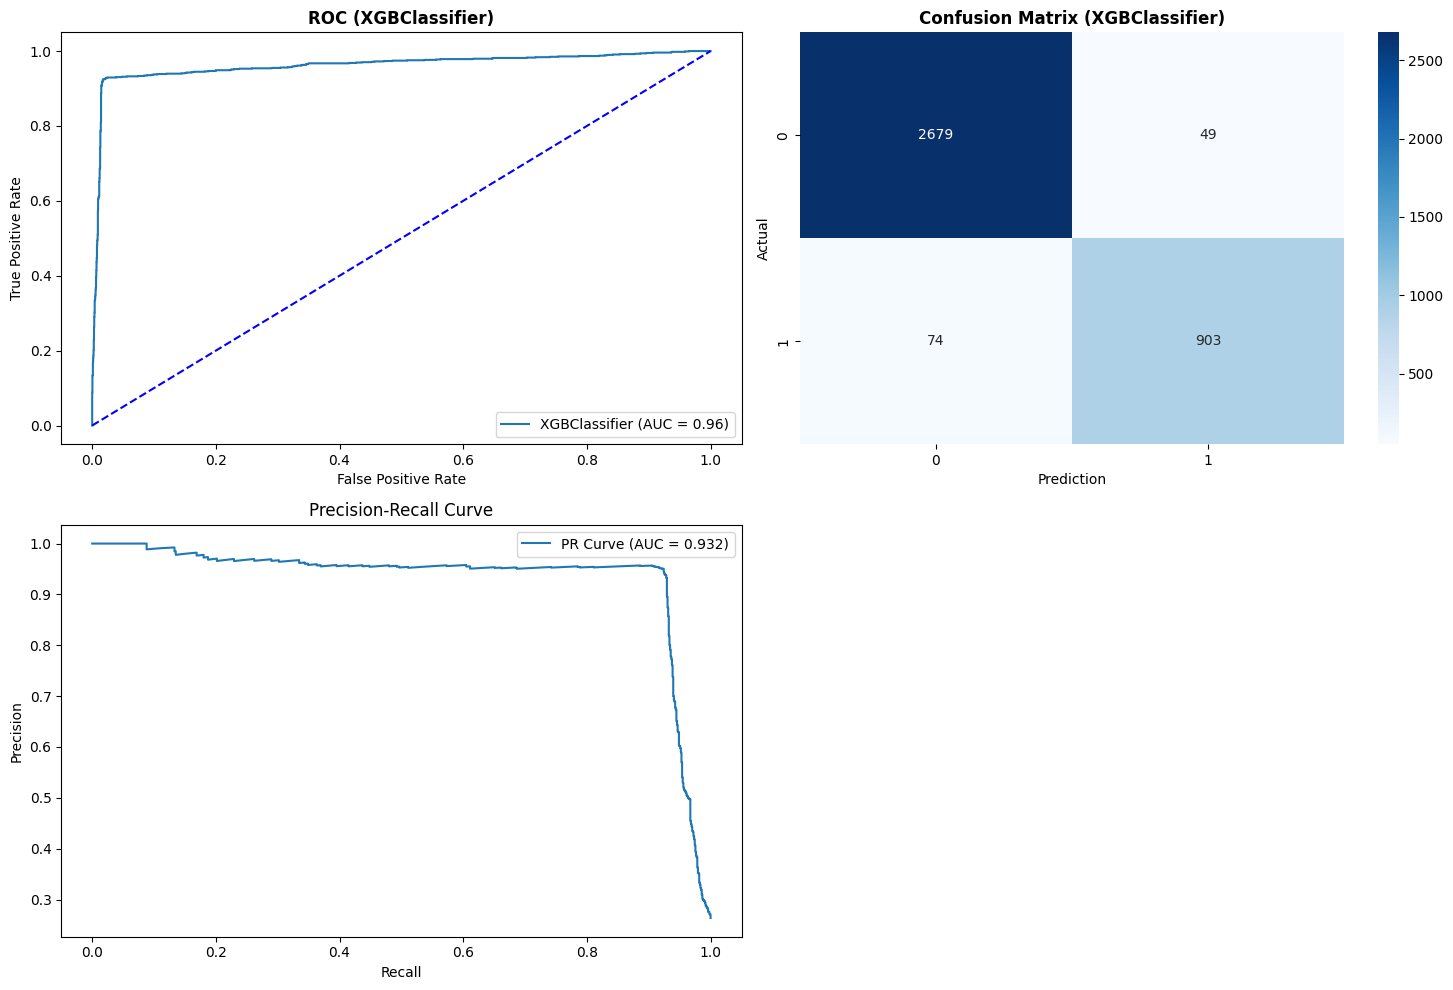

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.95      0.92      0.94       977

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [289]:
evaluate_model(model = best_model_xgb, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [290]:
best_model_xgb_clone = clone(best_model_xgb)
try:
    check_is_fitted(best_model_xgb_clone)
except NotFittedError:
    print("Clone does not fit ✅")

Clone does not fit ✅


## RandomForestClassifier

In [291]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'random_state': seed,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)

    score = cross_val_score(
        model,
        X=X_resampled,
        y=y_resampled,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )

    return score.mean()
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [292]:
study_rf.best_value

0.9747516736649778

In [293]:
study_rf.best_params

{'n_estimators': 527,
 'max_depth': 24,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'bootstrap': True,
 'criterion': 'gini'}

In [294]:
best_model_rf = RandomForestClassifier(**study_rf.best_params, n_jobs = -1, random_state=seed)
best_model_rf

RandomForestClassifier(max_depth=24, max_features=None, min_samples_split=5,
                       n_estimators=527, n_jobs=-1, random_state=42)

Evaluating RandomForestClassifier...


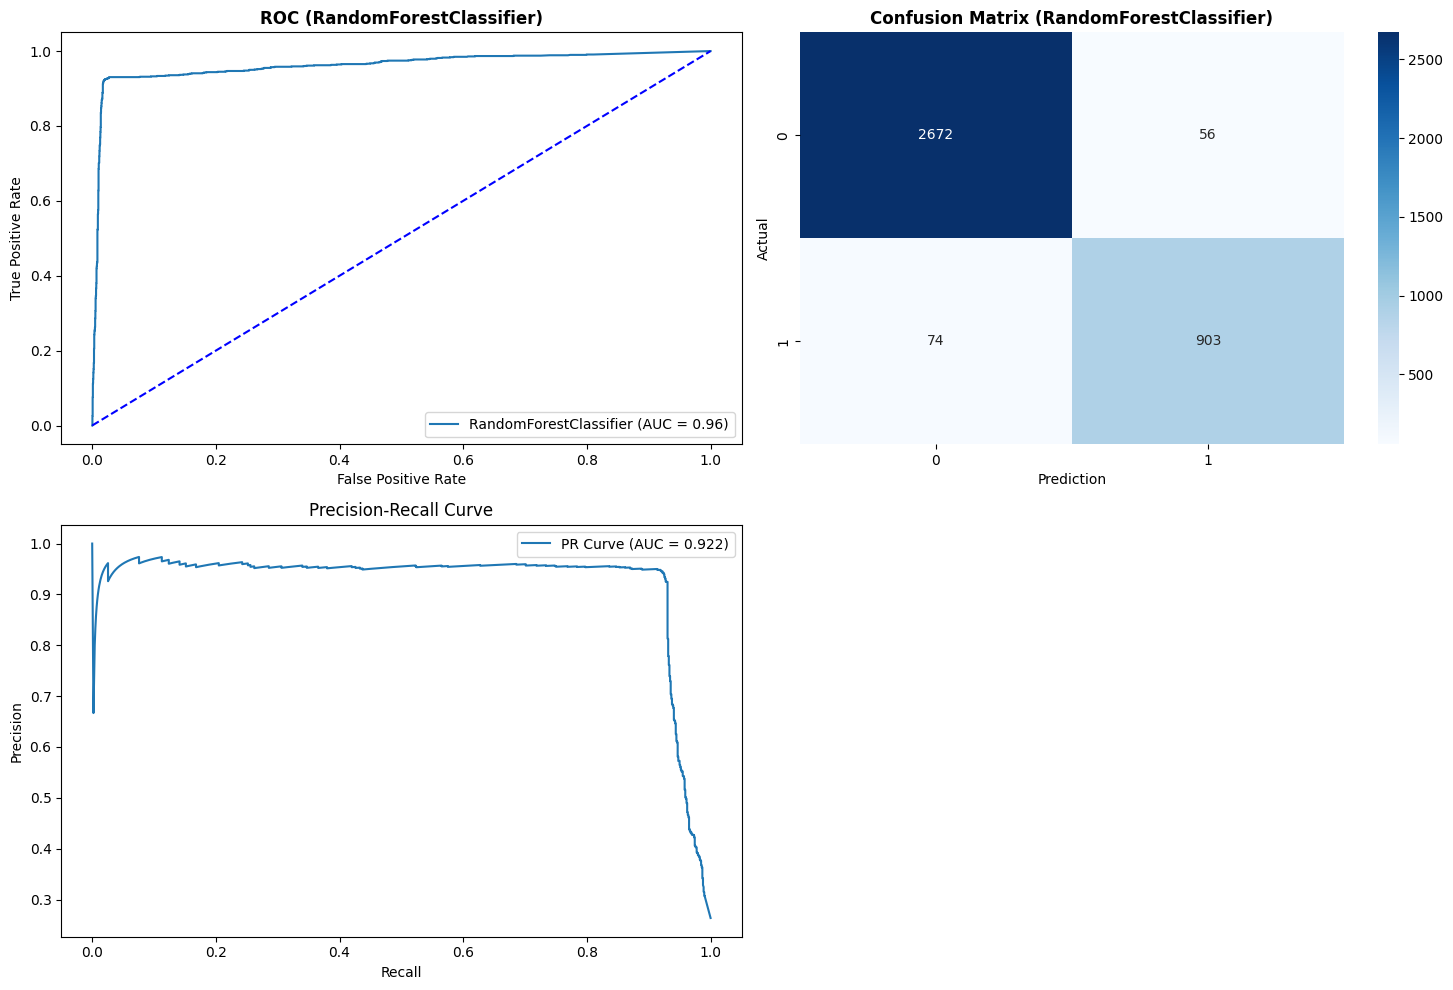

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.94      0.92      0.93       977

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [295]:
evaluate_model(model = best_model_rf, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [296]:
best_model_rf_clone = clone(best_model_rf)
try:
    check_is_fitted(best_model_rf_clone)
except NotFittedError:
    print("Clone does not fit ✅")

Clone does not fit ✅


## ExtraTreesClassifier

In [ ]:
def objective_etc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [False, True]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "n_jobs": -1,
        "random_state": seed
    }

    model = ExtraTreesClassifier(**params)
    score = cross_val_score(
        model,
        X=X_resampled,
        y=y_resampled,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )

    return score.mean()

study_etc = optuna.create_study(direction="maximize")
study_etc.optimize(objective_etc, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [298]:
study_etc.best_value

0.9747972940555583

In [299]:
study_etc.best_params

{'n_estimators': 251,
 'max_depth': 30,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': None,
 'bootstrap': False,
 'criterion': 'gini'}

In [300]:
best_model_etc = ExtraTreesClassifier(**study_etc.best_params, n_jobs = -1, random_state=seed)
best_model_etc

ExtraTreesClassifier(max_depth=30, max_features=None, min_samples_split=12,
                     n_estimators=251, n_jobs=-1, random_state=42)

Evaluating ExtraTreesClassifier...


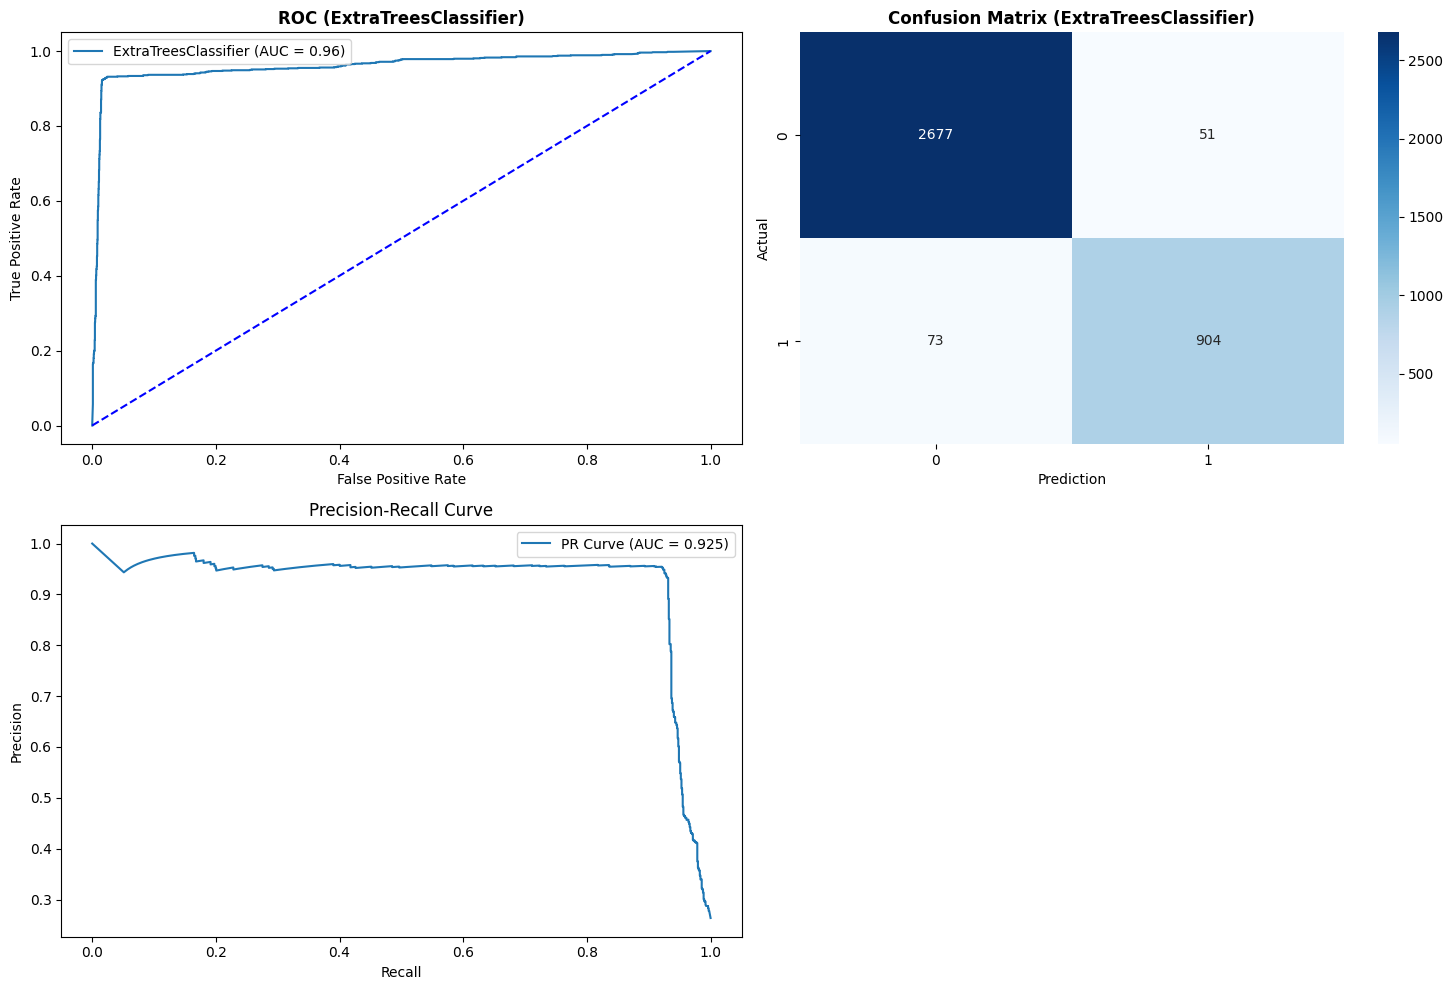

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.95      0.93      0.94       977

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [301]:
evaluate_model(model = best_model_etc, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [302]:
best_model_etc_clone = clone(best_model_etc)
try:
    check_is_fitted(best_model_etc_clone)
except NotFittedError:
    print("Clone does not fit ✅")

Clone does not fit ✅


## GradientBoostingClassifier

In [ ]:
def objective_gb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "random_state": seed
    }

    model = GradientBoostingClassifier(**params)
    score = cross_val_score(
        model,
        X=X_resampled,
        y=y_resampled,
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    ).mean()

    return score

study_gb = optuna.create_study(direction="maximize")
study_gb.optimize(objective_gb, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [304]:
study_gb.best_value

0.9773038920330576

In [305]:
study_gb.best_params

{'n_estimators': 330,
 'learning_rate': 0.11842245844903397,
 'max_depth': 4,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'subsample': 0.9315300677393332,
 'max_features': None}

In [306]:
best_model_gb = GradientBoostingClassifier(**study_gb.best_params, random_state=seed)
best_model_gb

GradientBoostingClassifier(learning_rate=0.11842245844903397, max_depth=4,
                           min_samples_leaf=10, min_samples_split=10,
                           n_estimators=330, random_state=42,
                           subsample=0.9315300677393332)

Evaluating GradientBoostingClassifier...


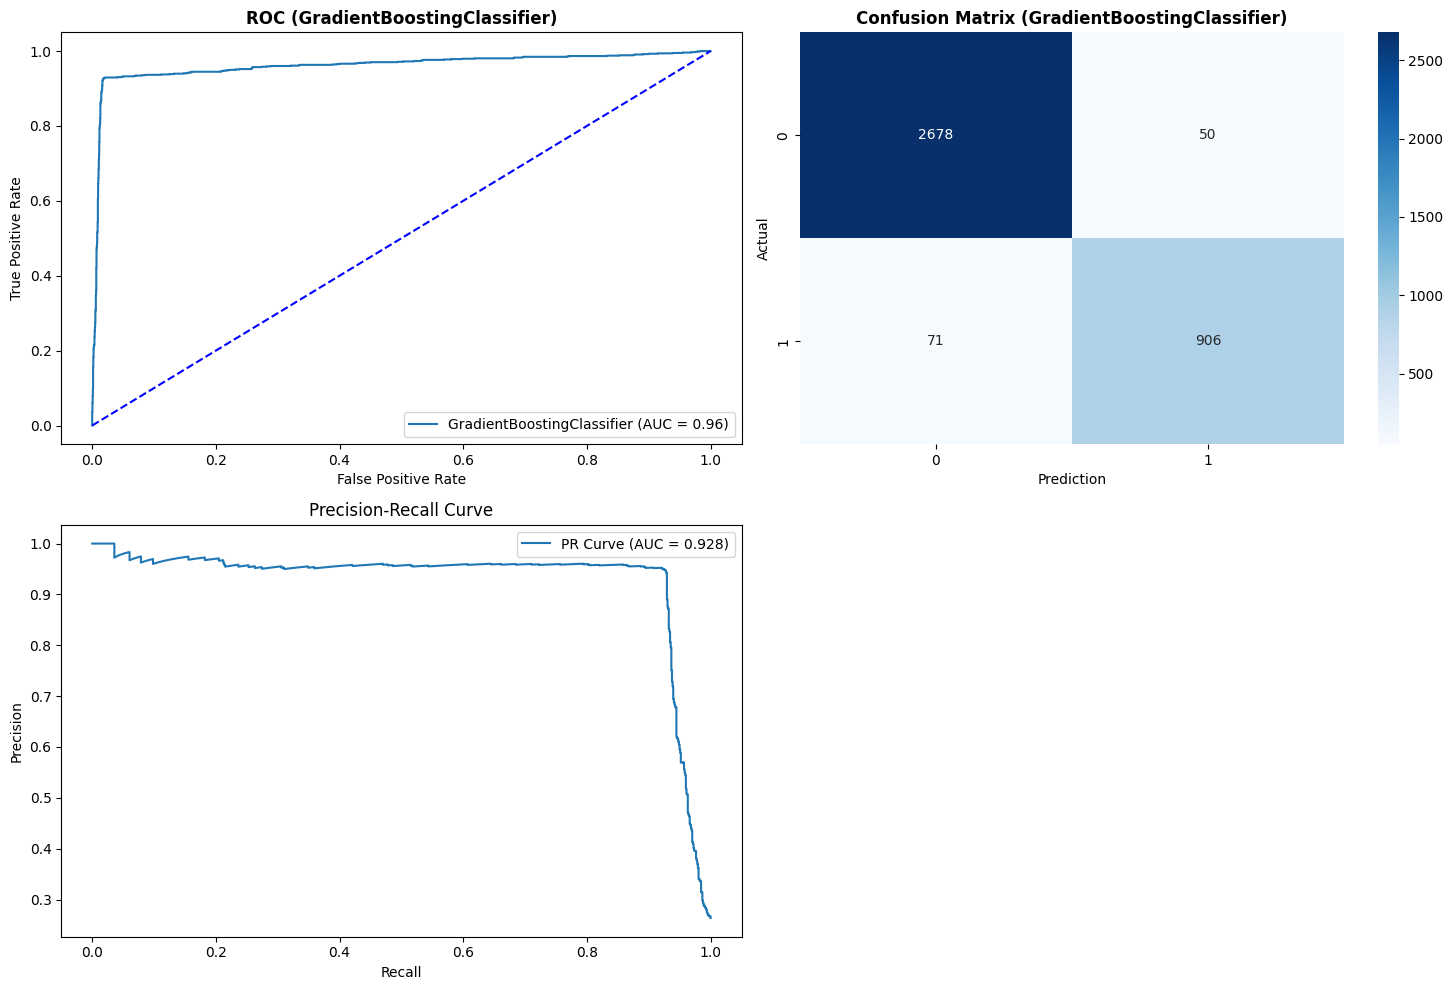

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.95      0.93      0.94       977

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [307]:
evaluate_model(model = best_model_gb, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [308]:
best_model_gb_clone = clone(best_model_gb)
try:
    check_is_fitted(best_model_gb_clone)
except NotFittedError:
    print("Clone does not fit ✅")

Clone does not fit ✅


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>


## VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("catboost", best_model_catboost_clone),
        ("xgb", best_model_xgb_clone),
        ("rf", best_model_rf_clone),
        ("etc", best_model_etc_clone),
        ("gb", best_model_gb_clone)
    ],
    voting="soft",
    weights=[1, 1, 1, 1, 1],
    n_jobs=-1
)

In [320]:
cv_scores = cross_val_score(
    voting_clf_soft,
    X=X_resampled,
    y=y_resampled,
    cv=kfold,
    scoring="accuracy",
    n_jobs=-1
)

In [321]:
print(f"Cross-validated Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated Accuracy (mean ± std): 0.9778 ± 0.0018


Evaluating VotingClassifier...


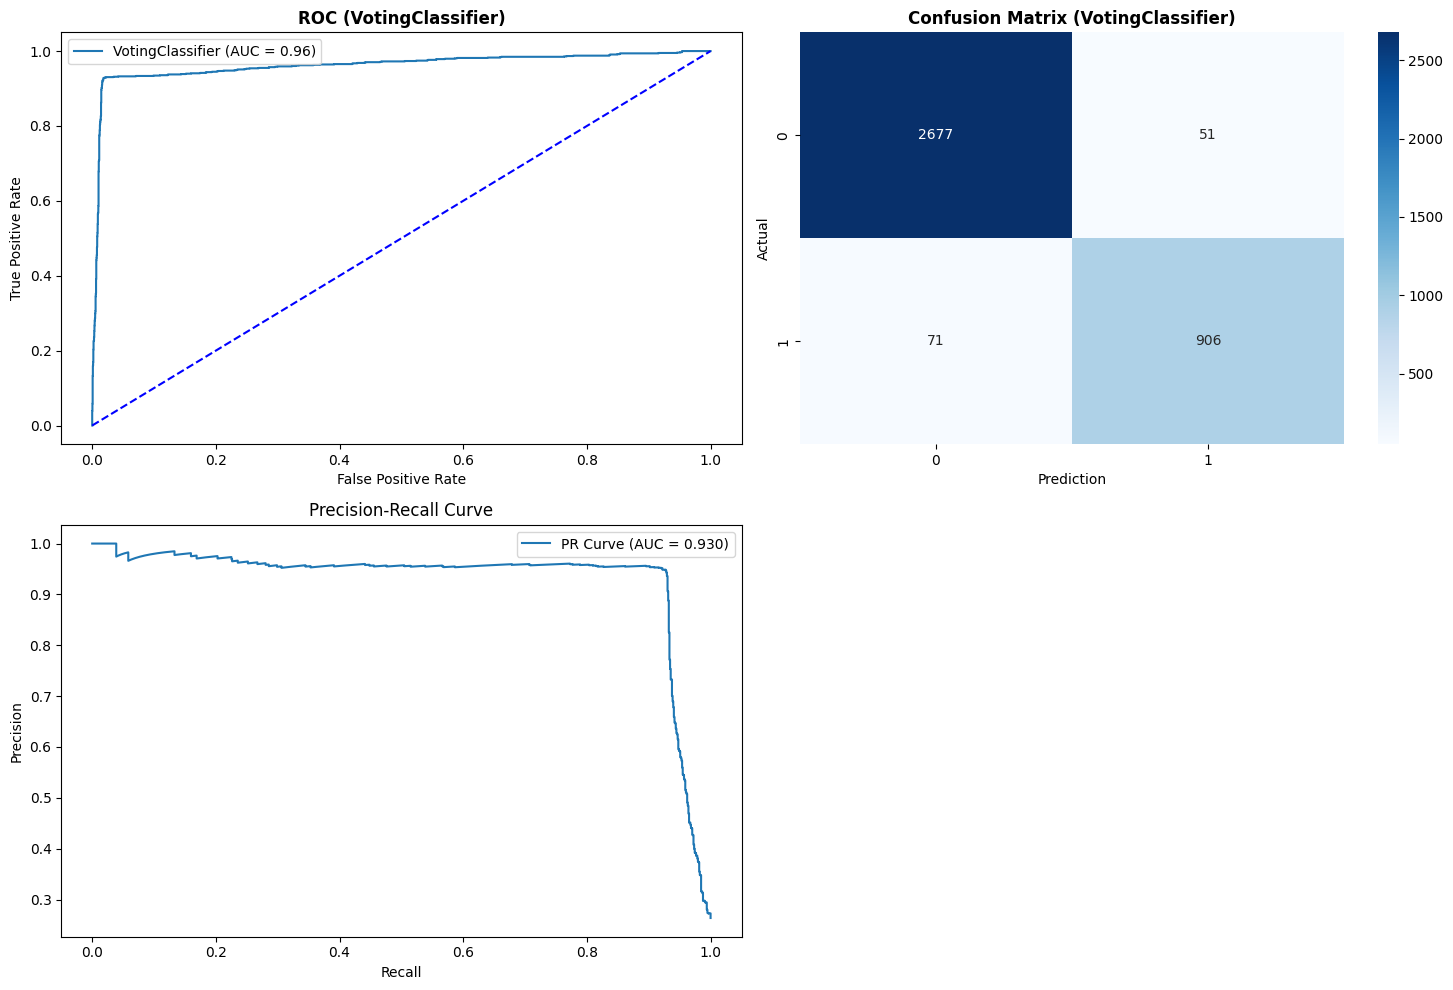

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2728
           1       0.95      0.93      0.94       977

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [322]:
evaluate_model(model = voting_clf_soft, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [323]:
try:
    check_is_fitted(voting_clf_soft)
except NotFittedError:
    print("Clone does not fit ✅")

In [314]:
df_test_prepared = preprocessor.transform(processed_test_df)

In [324]:
y_pred_final = voting_clf_soft.predict(df_test_prepared)
y_pred_final = label.inverse_transform(y_pred_final)

In [325]:
submission_df = pd.DataFrame({
    "id": list_test_id,
    "Personality": y_pred_final
})

submission_df.to_csv("submission4.csv", index=False)
print("\nSubmission file saved!")
submission_df.head(10)


Submission file saved!


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
5,18529,Extrovert
6,18530,Extrovert
7,18531,Introvert
8,18532,Extrovert
9,18533,Introvert


PermutationExplainer explainer: 101it [07:48,  4.69s/it]                         


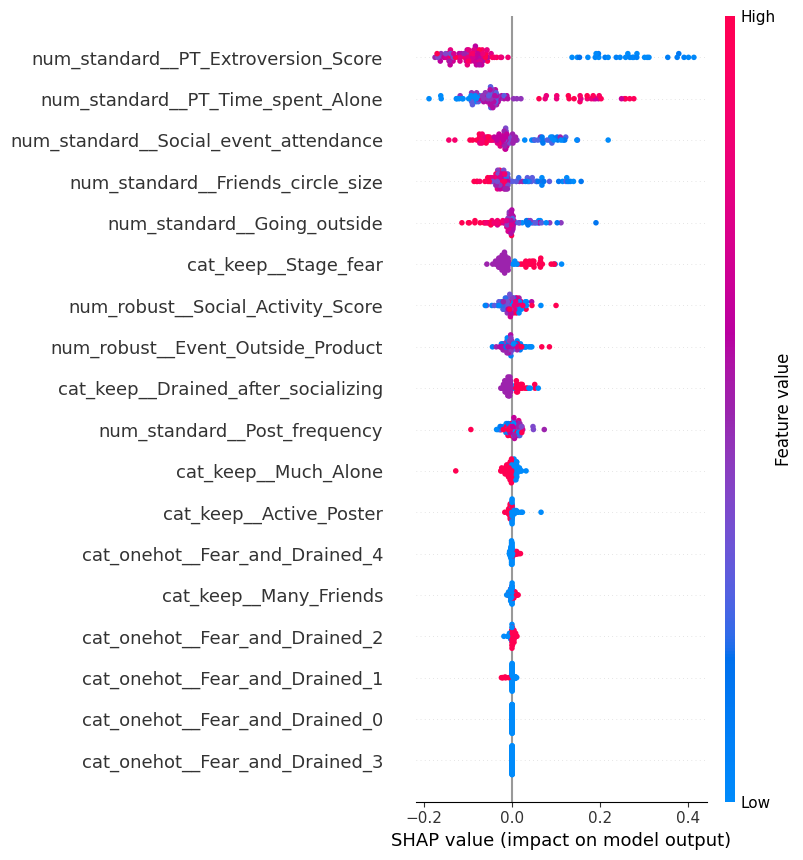

In [317]:
shap_plot(model=voting_clf_soft, X_test=df_test_prepared[:100], list_feature=list_feature_prepared)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
